In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data" , names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

# **Label Conversion (From String to Integer)**

In [3]:
df["class"] = df["class"].map({"g":1, "h":0})
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

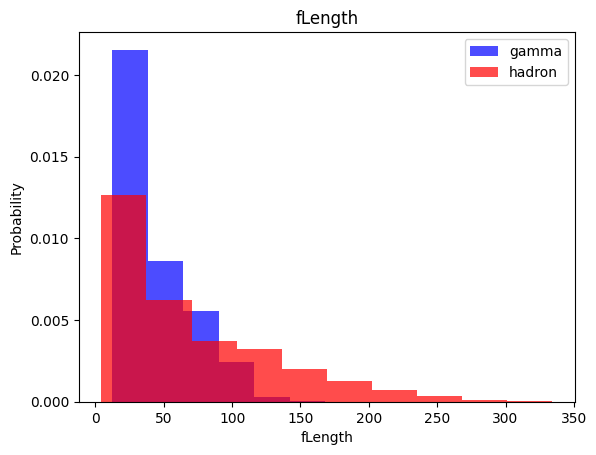

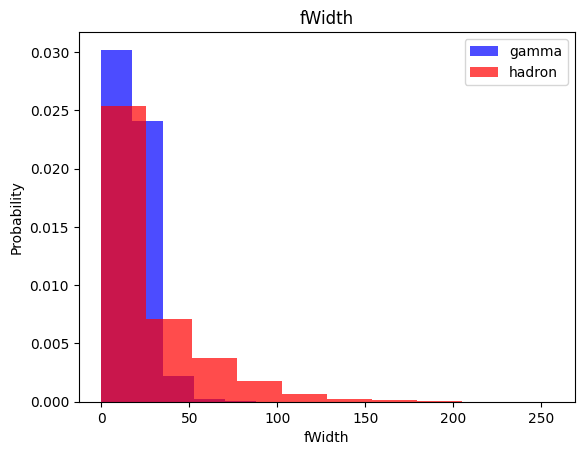

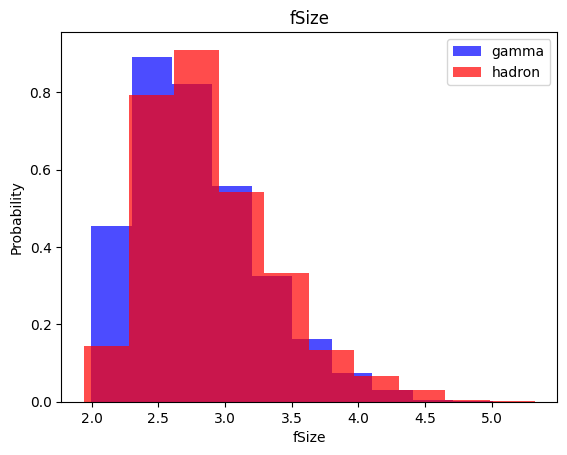

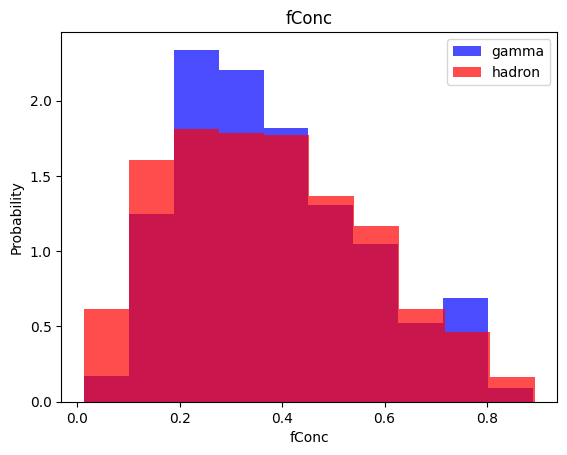

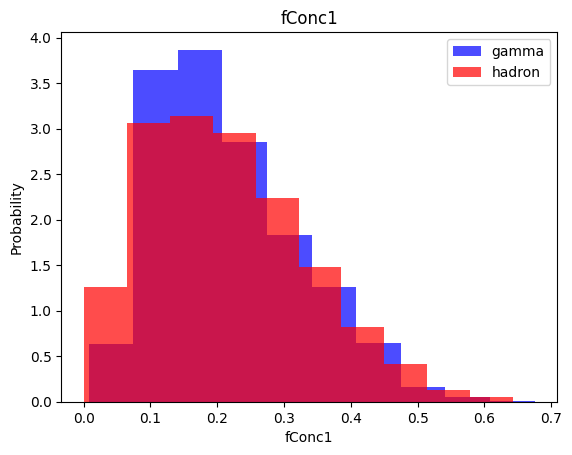

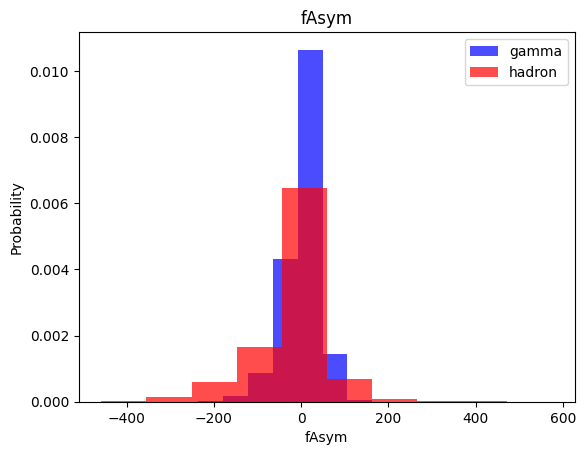

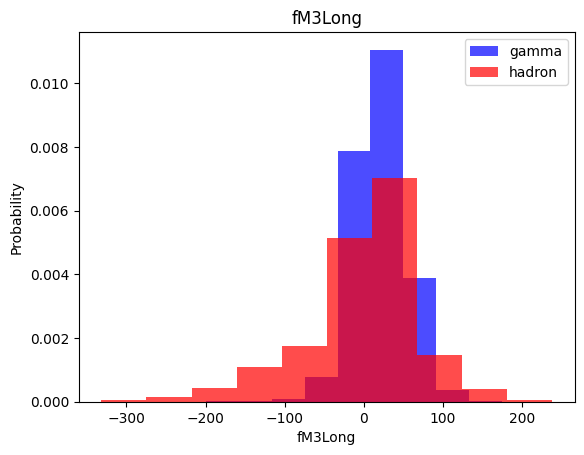

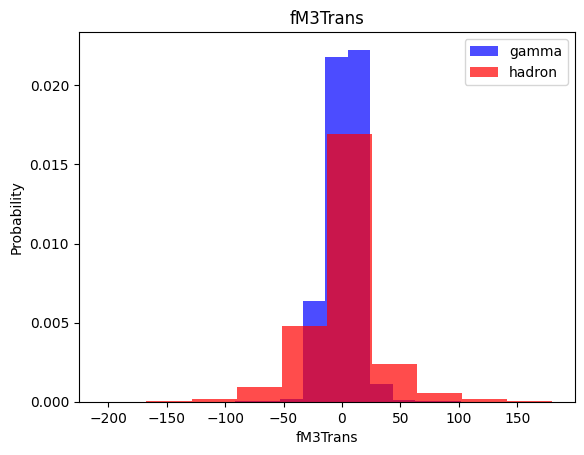

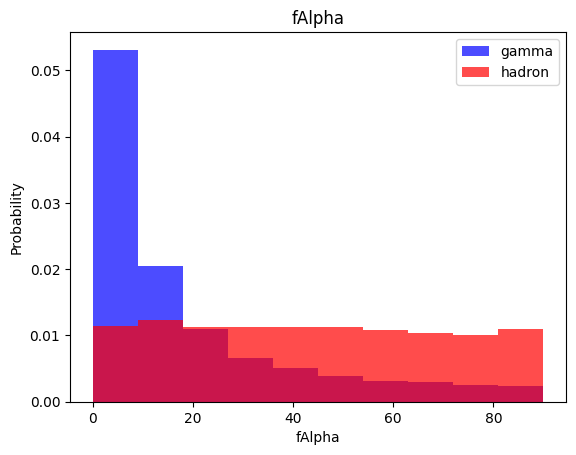

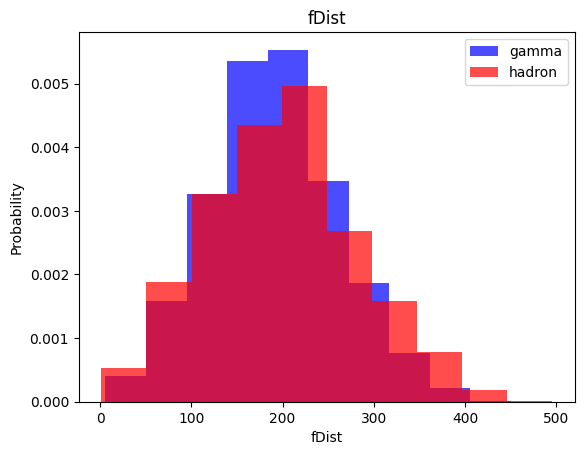

In [4]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color = 'blue', alpha = 0.7, label = 'gamma', density=True)
    plt.hist(df[df["class"] == 0][label], color = 'red', alpha = 0.7, label = 'hadron', density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# **Train, Validation and Test**

In [5]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

# **Data Scaling and Sampling**

In [6]:
def scale_data(dataframe , oversmaple = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  scaler.fit(X)
  X = scaler.transform(X)

  if oversmaple:
    ros = RandomOverSampler(random_state=0)
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))
  return data, X, y

In [7]:
train, X_train, y_train = scale_data(train , oversmaple=True)
valid, X_valid, y_valid = scale_data(valid , oversmaple=False)
test, X_test, y_test = scale_data(test , oversmaple=False)

In [8]:
sum(y_train == 1)

7404

In [9]:
sum(y_train == 0)

7404

# **K-Nearest Neighbors**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
y_pred = knn.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1350
           1       0.85      0.87      0.86      2454

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# **Naive Bayes**

In [13]:
from sklearn.naive_bayes import GaussianNB

nbG = GaussianNB()
nbG.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = nbG.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1350
           1       0.73      0.89      0.80      2454

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



# **Logistic Regression**

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1350
           1       0.84      0.82      0.83      2454

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# **Support Vector Machine**

In [18]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [19]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1350
           1       0.89      0.90      0.89      2454

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# **Classification with Neural Network**

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  ax1.plot(history.history['loss'] ,label="loss")
  ax1.plot(history.history['val_loss'] ,label="val_loss")
  ax1.set_title('model loss')
  ax1.set_ylabel('Birnary Crossentropy')
  ax1.set_xlabel('epoch')
  ax1.legend(['loss', 'val_loss'], loc='upper left')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'] ,label="accuracy")
  ax2.plot(history.history['val_accuracy'] ,label="val_accuracy")
  ax2.set_title('model accuracy')
  ax2.set_ylabel('accuracy')
  ax2.set_xlabel('epoch')
  ax2.legend(['accuracy', 'val_accuracy'], loc='upper left')
  ax2.grid(True)
  plt.show()

In [32]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu' , input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size, validation_data=(X_test, y_test) , use_multiprocessing=True)
  return nn_model, history

Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.4877 - accuracy: 0.7538 - val_loss: 0.4212 - val_accuracy: 0.8202
Epoch 2/3
463/463 [==============================] - 1s 3ms/step - loss: 0.4130 - accuracy: 0.8089 - val_loss: 0.3788 - val_accuracy: 0.8389
Epoch 3/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3951 - accuracy: 0.8207 - val_loss: 0.3599 - val_accuracy: 0.8475
num_nodes: 32, dropout_prob: 0.1, lr: 0.001, batch_size: 32


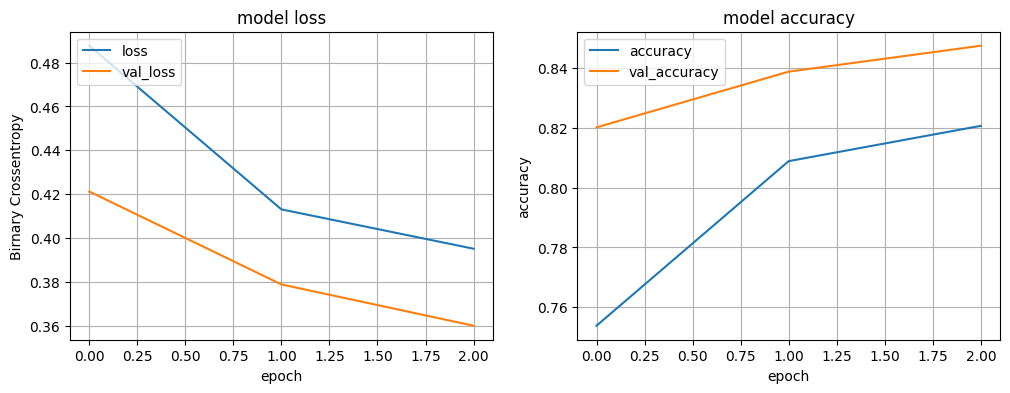

119/119 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8475
Epoch 1/3
232/232 [==============================] - 2s 3ms/step - loss: 0.5217 - accuracy: 0.7274 - val_loss: 0.4347 - val_accuracy: 0.8007
Epoch 2/3
232/232 [==============================] - 1s 3ms/step - loss: 0.4275 - accuracy: 0.8028 - val_loss: 0.4158 - val_accuracy: 0.8099
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 0.4093 - accuracy: 0.8121 - val_loss: 0.3795 - val_accuracy: 0.8360
num_nodes: 32, dropout_prob: 0.1, lr: 0.001, batch_size: 64


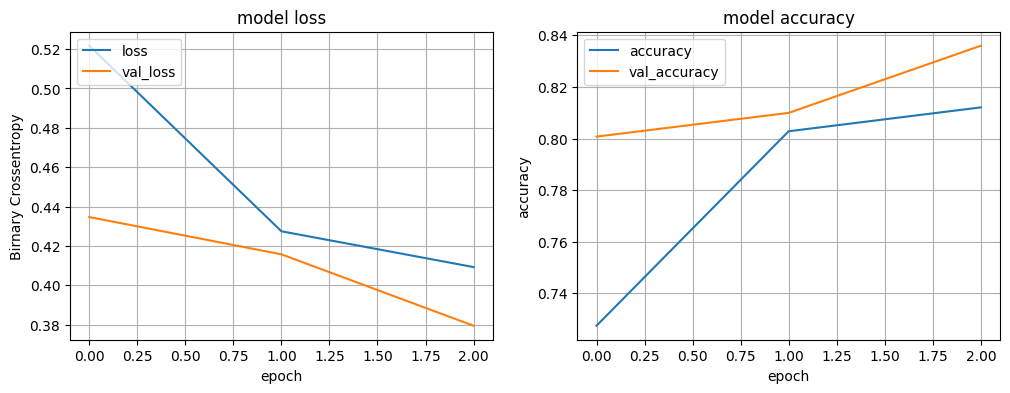

119/119 [==============================] - 0s 1ms/step - loss: 0.3795 - accuracy: 0.8360
Epoch 1/3
116/116 [==============================] - 1s 4ms/step - loss: 0.5813 - accuracy: 0.7181 - val_loss: 0.4793 - val_accuracy: 0.7787
Epoch 2/3
116/116 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.7871 - val_loss: 0.4212 - val_accuracy: 0.8078
Epoch 3/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.7990 - val_loss: 0.4049 - val_accuracy: 0.8210
num_nodes: 32, dropout_prob: 0.1, lr: 0.001, batch_size: 128


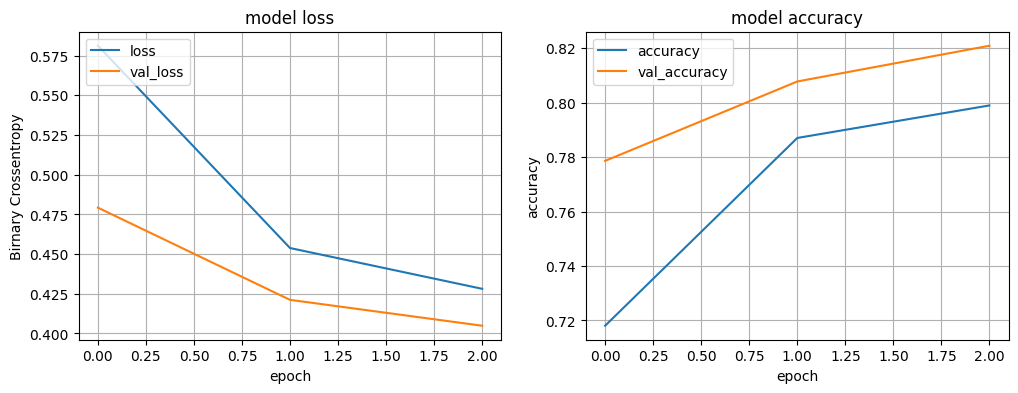

119/119 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.8210
Epoch 1/3
463/463 [==============================] - 2s 2ms/step - loss: 0.4198 - accuracy: 0.8069 - val_loss: 0.3810 - val_accuracy: 0.8352
Epoch 2/3
463/463 [==============================] - 1s 2ms/step - loss: 0.3730 - accuracy: 0.8340 - val_loss: 0.3374 - val_accuracy: 0.8607
Epoch 3/3
463/463 [==============================] - 1s 2ms/step - loss: 0.3632 - accuracy: 0.8354 - val_loss: 0.3450 - val_accuracy: 0.8578
num_nodes: 32, dropout_prob: 0.1, lr: 0.01, batch_size: 32


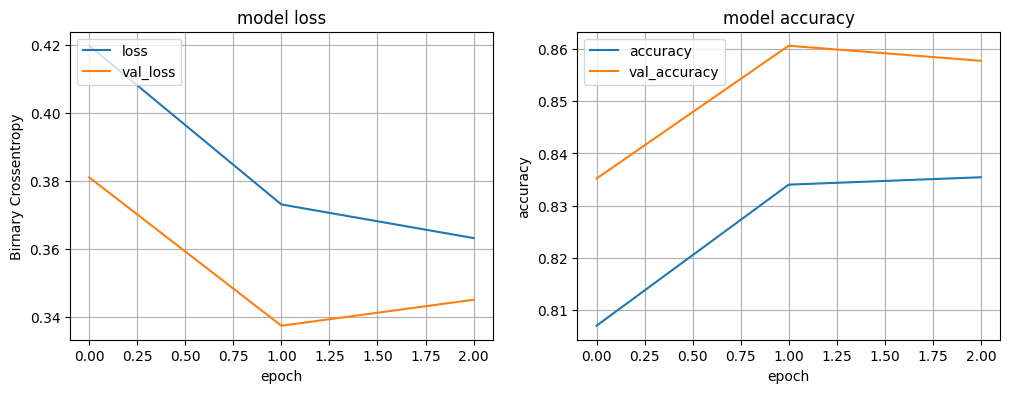

119/119 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8578
Epoch 1/3
232/232 [==============================] - 2s 5ms/step - loss: 0.4221 - accuracy: 0.8033 - val_loss: 0.3761 - val_accuracy: 0.8457
Epoch 2/3
232/232 [==============================] - 1s 4ms/step - loss: 0.3713 - accuracy: 0.8310 - val_loss: 0.3389 - val_accuracy: 0.8557
Epoch 3/3
232/232 [==============================] - 1s 2ms/step - loss: 0.3614 - accuracy: 0.8361 - val_loss: 0.3542 - val_accuracy: 0.8433
num_nodes: 32, dropout_prob: 0.1, lr: 0.01, batch_size: 64


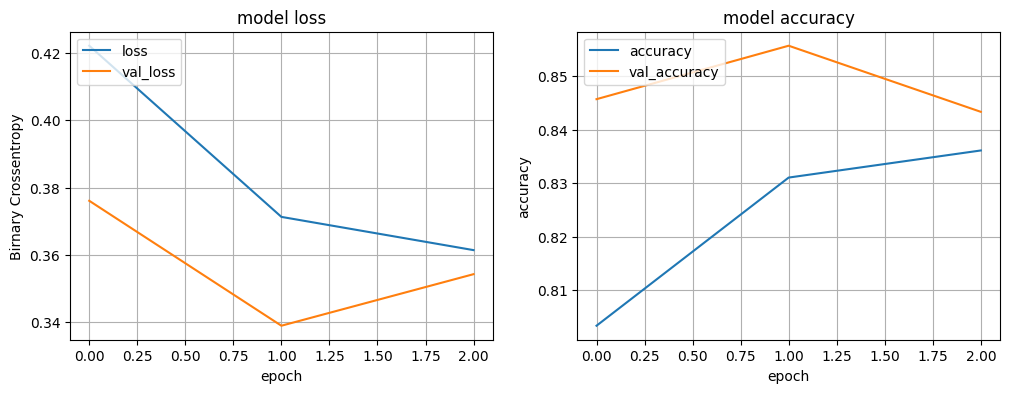

119/119 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8433
Epoch 1/3
116/116 [==============================] - 1s 4ms/step - loss: 0.4250 - accuracy: 0.8014 - val_loss: 0.3945 - val_accuracy: 0.8265
Epoch 2/3
116/116 [==============================] - 0s 3ms/step - loss: 0.3793 - accuracy: 0.8296 - val_loss: 0.3520 - val_accuracy: 0.8515
Epoch 3/3
116/116 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.8330 - val_loss: 0.3508 - val_accuracy: 0.8478
num_nodes: 32, dropout_prob: 0.1, lr: 0.01, batch_size: 128


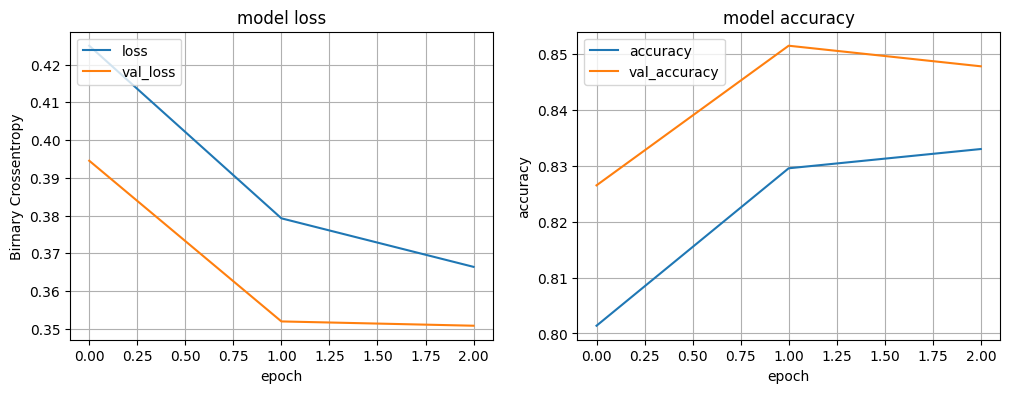

119/119 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8478
Epoch 1/3
463/463 [==============================] - 2s 2ms/step - loss: 0.5217 - accuracy: 0.7482 - val_loss: 0.4582 - val_accuracy: 0.7787
Epoch 2/3
463/463 [==============================] - 1s 2ms/step - loss: 0.5149 - accuracy: 0.7366 - val_loss: 0.4573 - val_accuracy: 0.7992
Epoch 3/3
463/463 [==============================] - 1s 2ms/step - loss: 0.5128 - accuracy: 0.7324 - val_loss: 0.4968 - val_accuracy: 0.7003
num_nodes: 32, dropout_prob: 0.1, lr: 0.1, batch_size: 32


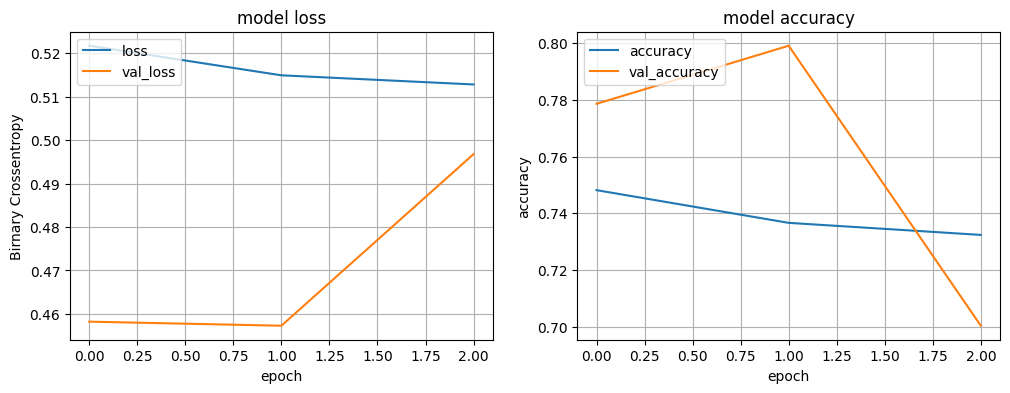

119/119 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.7003
Epoch 1/3
232/232 [==============================] - 2s 4ms/step - loss: 0.4641 - accuracy: 0.7808 - val_loss: 0.4134 - val_accuracy: 0.8354
Epoch 2/3
232/232 [==============================] - 1s 3ms/step - loss: 0.4498 - accuracy: 0.7902 - val_loss: 0.4263 - val_accuracy: 0.8402
Epoch 3/3
232/232 [==============================] - 1s 2ms/step - loss: 0.4303 - accuracy: 0.8004 - val_loss: 0.4105 - val_accuracy: 0.8546
num_nodes: 32, dropout_prob: 0.1, lr: 0.1, batch_size: 64


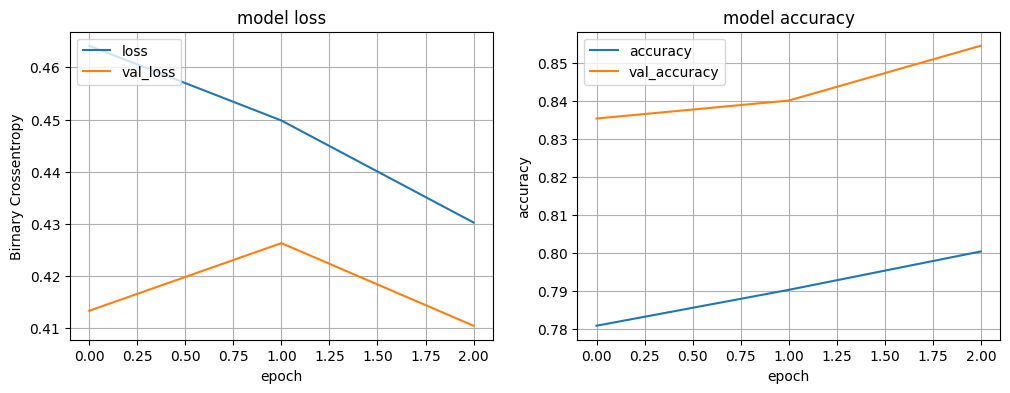

119/119 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8546
Epoch 1/3
116/116 [==============================] - 1s 4ms/step - loss: 0.4579 - accuracy: 0.7870 - val_loss: 0.4101 - val_accuracy: 0.8089
Epoch 2/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8144 - val_loss: 0.3862 - val_accuracy: 0.8126
Epoch 3/3
116/116 [==============================] - 0s 3ms/step - loss: 0.3972 - accuracy: 0.8186 - val_loss: 0.3642 - val_accuracy: 0.8420
num_nodes: 32, dropout_prob: 0.1, lr: 0.1, batch_size: 128


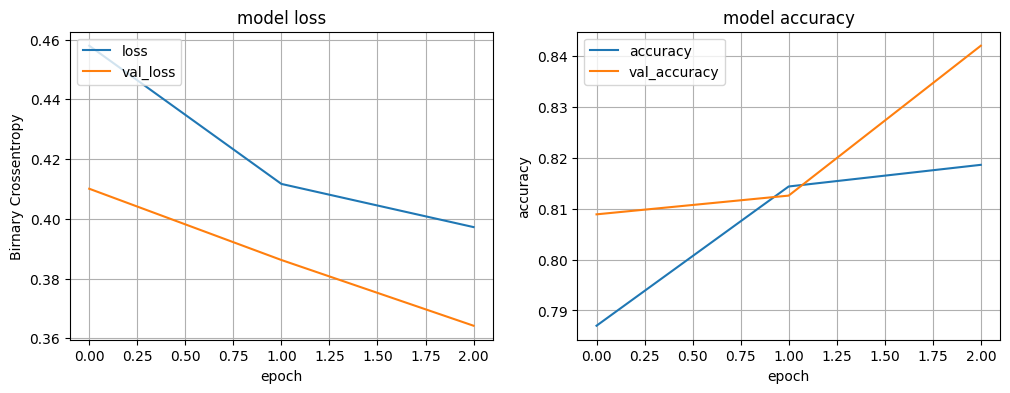

119/119 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8420
Epoch 1/3
463/463 [==============================] - 2s 2ms/step - loss: 0.4930 - accuracy: 0.7583 - val_loss: 0.4155 - val_accuracy: 0.8097
Epoch 2/3
463/463 [==============================] - 1s 2ms/step - loss: 0.4294 - accuracy: 0.7973 - val_loss: 0.3982 - val_accuracy: 0.8247
Epoch 3/3
463/463 [==============================] - 1s 2ms/step - loss: 0.4130 - accuracy: 0.8134 - val_loss: 0.3898 - val_accuracy: 0.8273
num_nodes: 32, dropout_prob: 0.2, lr: 0.001, batch_size: 32


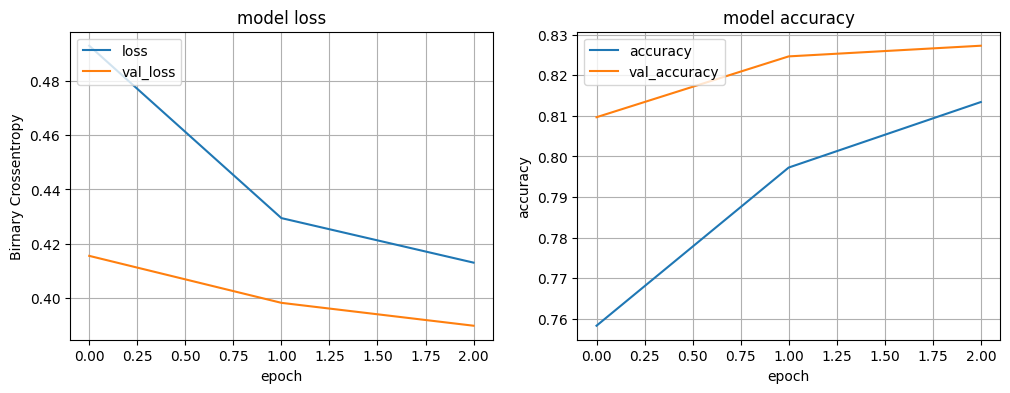

119/119 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8273
Epoch 1/3
232/232 [==============================] - 2s 5ms/step - loss: 0.5264 - accuracy: 0.7330 - val_loss: 0.4405 - val_accuracy: 0.8073
Epoch 2/3
232/232 [==============================] - 1s 2ms/step - loss: 0.4516 - accuracy: 0.7865 - val_loss: 0.4101 - val_accuracy: 0.8199
Epoch 3/3
232/232 [==============================] - 1s 2ms/step - loss: 0.4317 - accuracy: 0.7986 - val_loss: 0.4047 - val_accuracy: 0.8152
num_nodes: 32, dropout_prob: 0.2, lr: 0.001, batch_size: 64


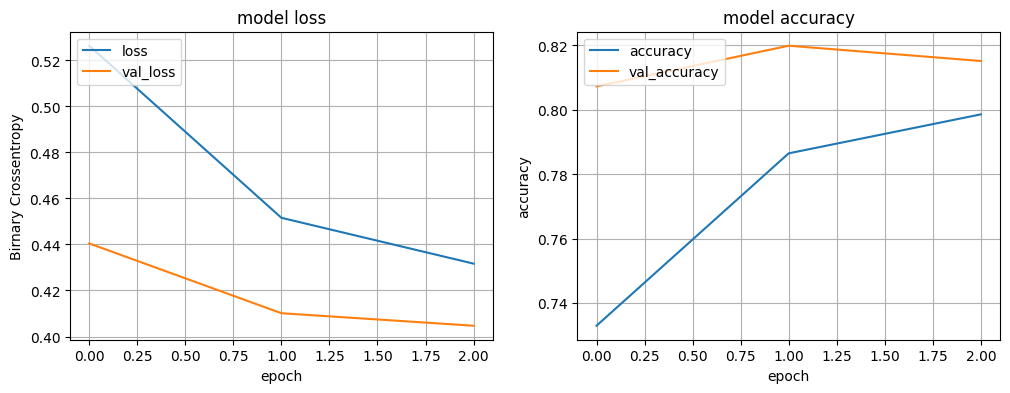

119/119 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8152
Epoch 1/3
116/116 [==============================] - 1s 4ms/step - loss: 0.5659 - accuracy: 0.7193 - val_loss: 0.4627 - val_accuracy: 0.7926
Epoch 2/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.7805 - val_loss: 0.4302 - val_accuracy: 0.8073
Epoch 3/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.7923 - val_loss: 0.4061 - val_accuracy: 0.8265
num_nodes: 32, dropout_prob: 0.2, lr: 0.001, batch_size: 128


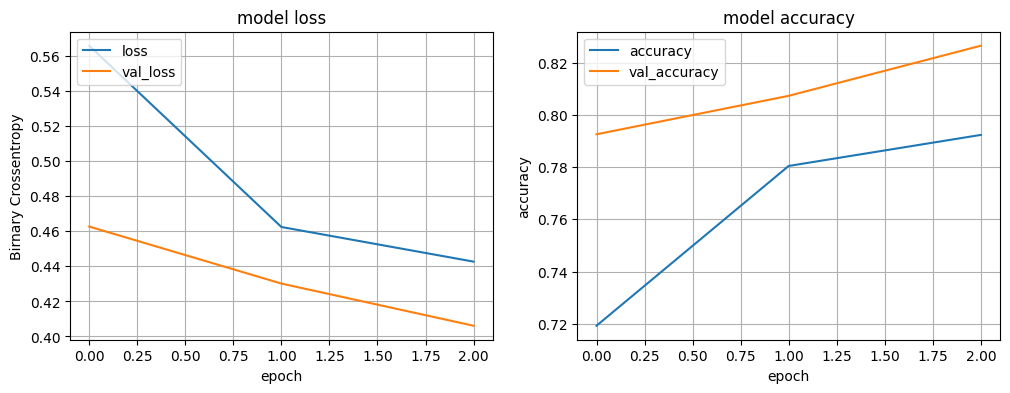

119/119 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8265
Epoch 1/3
463/463 [==============================] - 2s 3ms/step - loss: 0.4307 - accuracy: 0.8011 - val_loss: 0.3710 - val_accuracy: 0.8449
Epoch 2/3
463/463 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8268 - val_loss: 0.3576 - val_accuracy: 0.8496
Epoch 3/3
463/463 [==============================] - 1s 3ms/step - loss: 0.3801 - accuracy: 0.8283 - val_loss: 0.3404 - val_accuracy: 0.8615
num_nodes: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 32


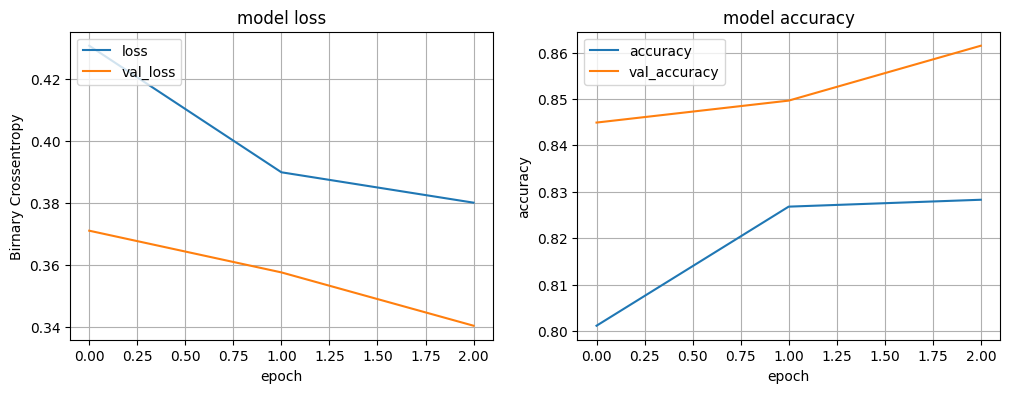

119/119 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8615
Epoch 1/3
232/232 [==============================] - 2s 3ms/step - loss: 0.4373 - accuracy: 0.8002 - val_loss: 0.3674 - val_accuracy: 0.8470
Epoch 2/3
232/232 [==============================] - 1s 2ms/step - loss: 0.3865 - accuracy: 0.8236 - val_loss: 0.3581 - val_accuracy: 0.8509
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 0.3768 - accuracy: 0.8285 - val_loss: 0.3395 - val_accuracy: 0.8617
num_nodes: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 64


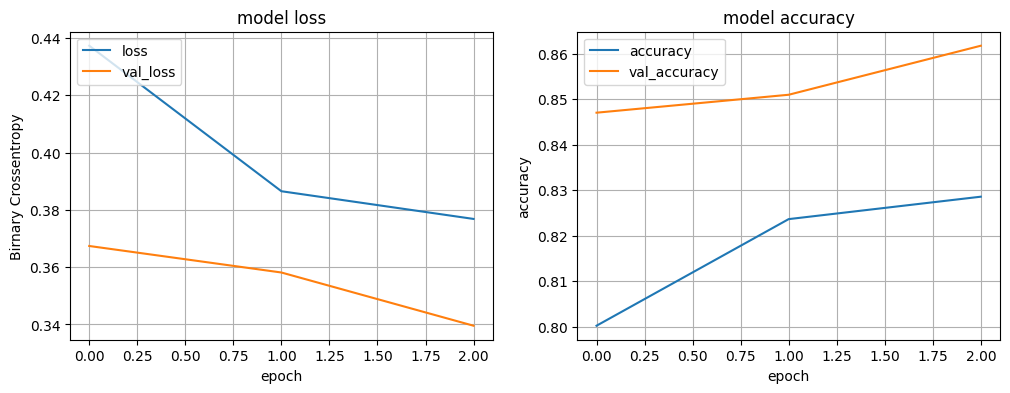

119/119 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8617
Epoch 1/3
116/116 [==============================] - 1s 4ms/step - loss: 0.4586 - accuracy: 0.7809 - val_loss: 0.4308 - val_accuracy: 0.8044
Epoch 2/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4012 - accuracy: 0.8174 - val_loss: 0.3515 - val_accuracy: 0.8530
Epoch 3/3
116/116 [==============================] - 0s 3ms/step - loss: 0.3799 - accuracy: 0.8292 - val_loss: 0.3445 - val_accuracy: 0.8533
num_nodes: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 128


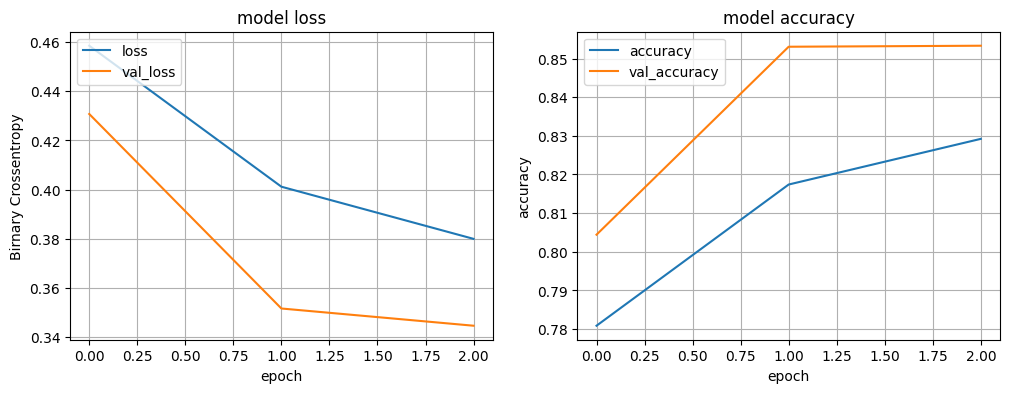

119/119 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8533
Epoch 1/3
463/463 [==============================] - 2s 3ms/step - loss: 0.5707 - accuracy: 0.7165 - val_loss: 0.6584 - val_accuracy: 0.5773
Epoch 2/3
463/463 [==============================] - 1s 3ms/step - loss: 0.6994 - accuracy: 0.5473 - val_loss: 0.7193 - val_accuracy: 0.3546
Epoch 3/3
463/463 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5488 - val_loss: 0.6182 - val_accuracy: 0.7371
num_nodes: 32, dropout_prob: 0.2, lr: 0.1, batch_size: 32


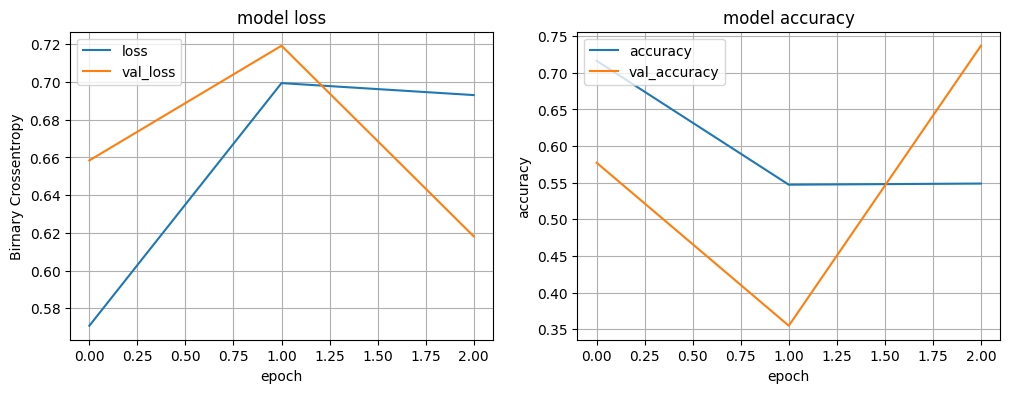

119/119 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7371
Epoch 1/3
232/232 [==============================] - 2s 3ms/step - loss: 0.5027 - accuracy: 0.7452 - val_loss: 0.4759 - val_accuracy: 0.7461
Epoch 2/3
232/232 [==============================] - 1s 3ms/step - loss: 0.4936 - accuracy: 0.7566 - val_loss: 0.4302 - val_accuracy: 0.8346
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 0.4854 - accuracy: 0.7618 - val_loss: 0.5755 - val_accuracy: 0.6577
num_nodes: 32, dropout_prob: 0.2, lr: 0.1, batch_size: 64


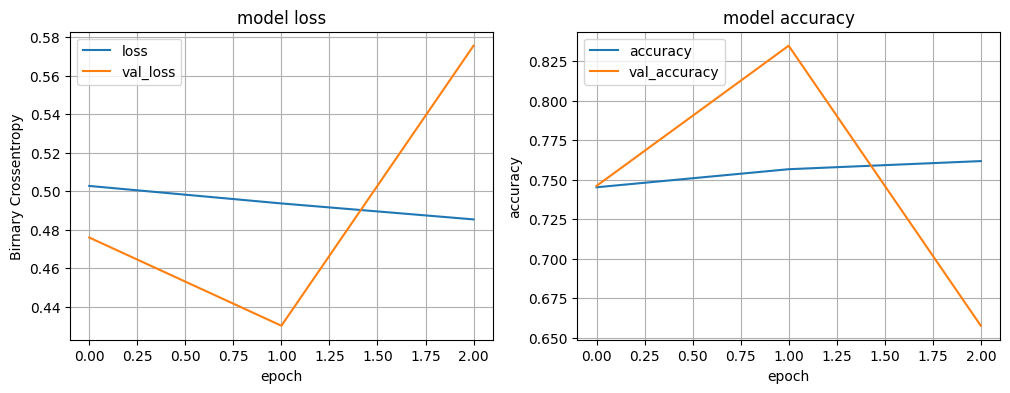

119/119 [==============================] - 0s 2ms/step - loss: 0.5755 - accuracy: 0.6577
Epoch 1/3
116/116 [==============================] - 1s 4ms/step - loss: 0.4643 - accuracy: 0.7770 - val_loss: 0.3898 - val_accuracy: 0.8402
Epoch 2/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4403 - accuracy: 0.7969 - val_loss: 0.3624 - val_accuracy: 0.8444
Epoch 3/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.8059 - val_loss: 0.3681 - val_accuracy: 0.8544
num_nodes: 32, dropout_prob: 0.2, lr: 0.1, batch_size: 128


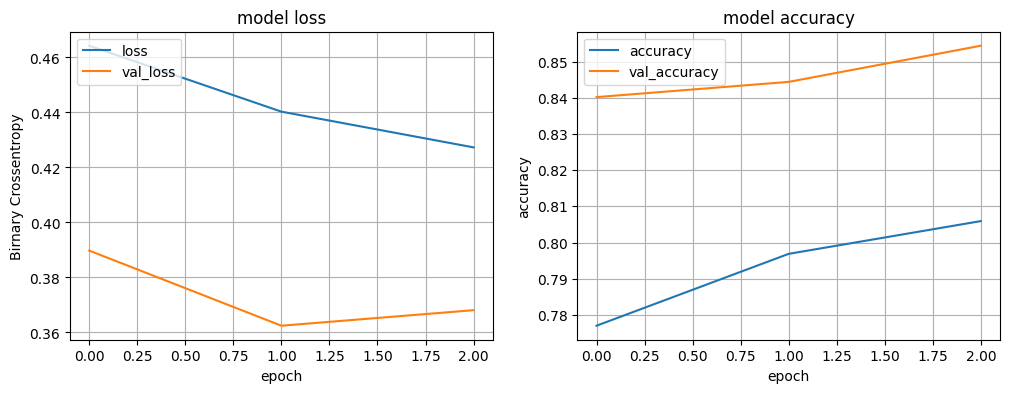

119/119 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8544
Epoch 1/3
463/463 [==============================] - 2s 3ms/step - loss: 0.5369 - accuracy: 0.7152 - val_loss: 0.4328 - val_accuracy: 0.8086
Epoch 2/3
463/463 [==============================] - 2s 3ms/step - loss: 0.4609 - accuracy: 0.7825 - val_loss: 0.4113 - val_accuracy: 0.8218
Epoch 3/3
463/463 [==============================] - 2s 3ms/step - loss: 0.4424 - accuracy: 0.7955 - val_loss: 0.4043 - val_accuracy: 0.8239
num_nodes: 32, dropout_prob: 0.3, lr: 0.001, batch_size: 32


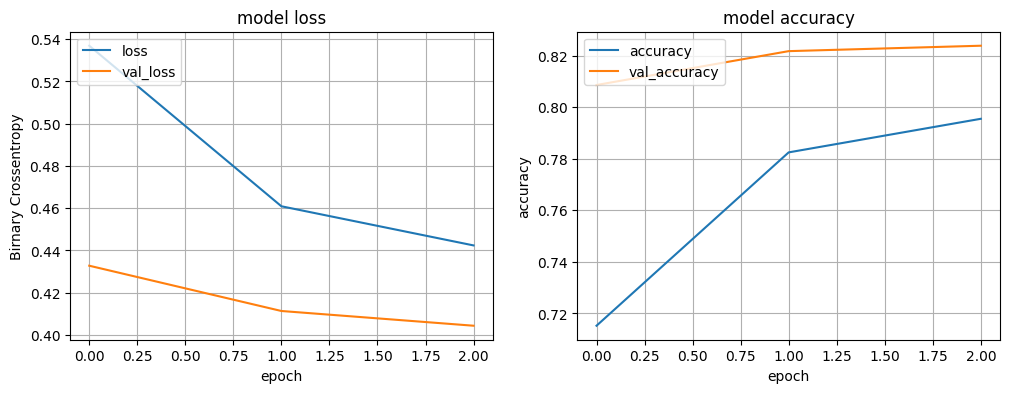

119/119 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8239
Epoch 1/3
232/232 [==============================] - 2s 6ms/step - loss: 0.5652 - accuracy: 0.7032 - val_loss: 0.4507 - val_accuracy: 0.8026
Epoch 2/3
232/232 [==============================] - 1s 3ms/step - loss: 0.4705 - accuracy: 0.7765 - val_loss: 0.4211 - val_accuracy: 0.8126
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 0.4421 - accuracy: 0.7937 - val_loss: 0.4046 - val_accuracy: 0.8241
num_nodes: 32, dropout_prob: 0.3, lr: 0.001, batch_size: 64


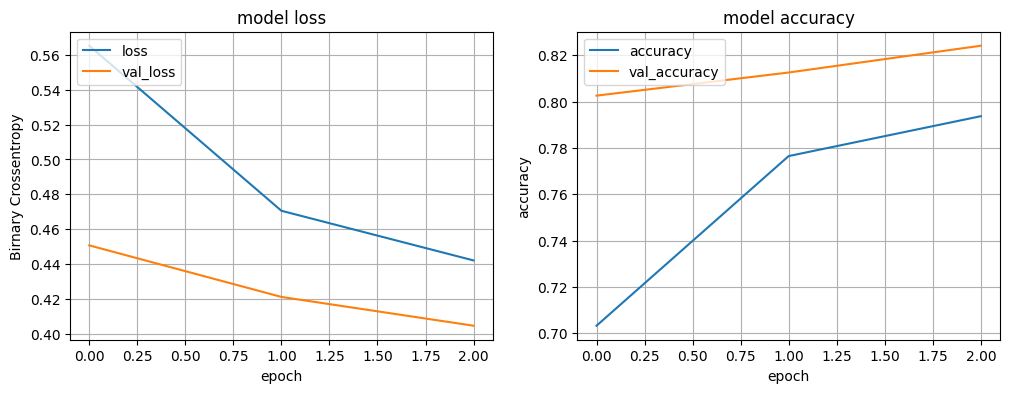

119/119 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8241
Epoch 1/3
116/116 [==============================] - 1s 4ms/step - loss: 0.5777 - accuracy: 0.6985 - val_loss: 0.4537 - val_accuracy: 0.8036
Epoch 2/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.7776 - val_loss: 0.4163 - val_accuracy: 0.8157
Epoch 3/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4481 - accuracy: 0.7940 - val_loss: 0.4034 - val_accuracy: 0.8312
num_nodes: 32, dropout_prob: 0.3, lr: 0.001, batch_size: 128


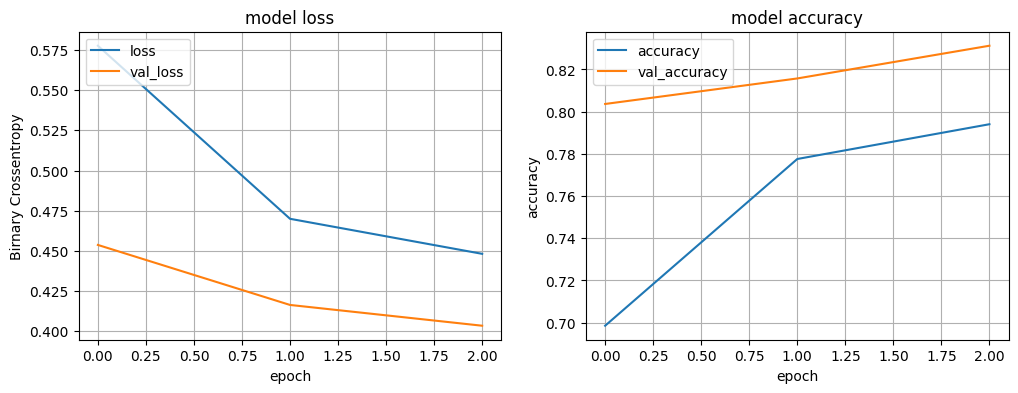

119/119 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8312
Epoch 1/3
463/463 [==============================] - 2s 3ms/step - loss: 0.4459 - accuracy: 0.7911 - val_loss: 0.3799 - val_accuracy: 0.8407
Epoch 2/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3984 - accuracy: 0.8212 - val_loss: 0.3543 - val_accuracy: 0.8496
Epoch 3/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3828 - accuracy: 0.8253 - val_loss: 0.3514 - val_accuracy: 0.8502
num_nodes: 32, dropout_prob: 0.3, lr: 0.01, batch_size: 32


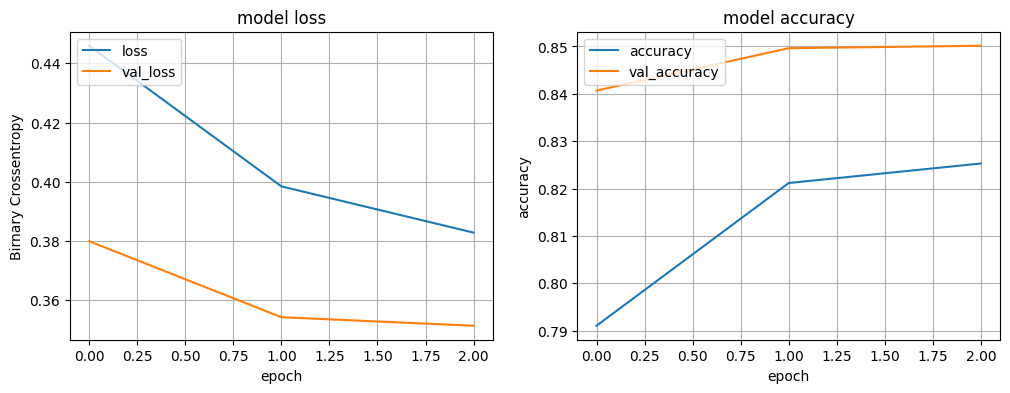

119/119 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8502
Epoch 1/3
232/232 [==============================] - 2s 3ms/step - loss: 0.4545 - accuracy: 0.7905 - val_loss: 0.3963 - val_accuracy: 0.8202
Epoch 2/3
232/232 [==============================] - 1s 3ms/step - loss: 0.3980 - accuracy: 0.8225 - val_loss: 0.3574 - val_accuracy: 0.8362
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 0.3839 - accuracy: 0.8285 - val_loss: 0.3387 - val_accuracy: 0.8541
num_nodes: 32, dropout_prob: 0.3, lr: 0.01, batch_size: 64


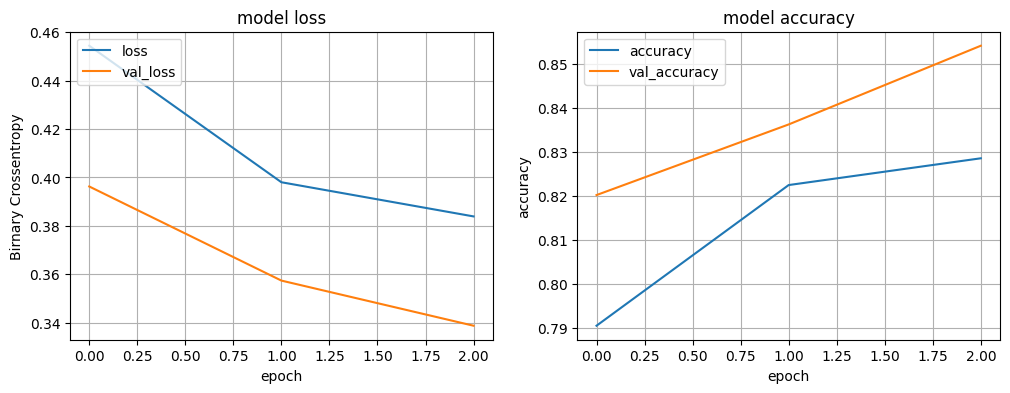

119/119 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8541
Epoch 1/3
116/116 [==============================] - 2s 9ms/step - loss: 0.4789 - accuracy: 0.7694 - val_loss: 0.4258 - val_accuracy: 0.8210
Epoch 2/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4049 - accuracy: 0.8181 - val_loss: 0.3572 - val_accuracy: 0.8494
Epoch 3/3
116/116 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8241 - val_loss: 0.3521 - val_accuracy: 0.8433
num_nodes: 32, dropout_prob: 0.3, lr: 0.01, batch_size: 128


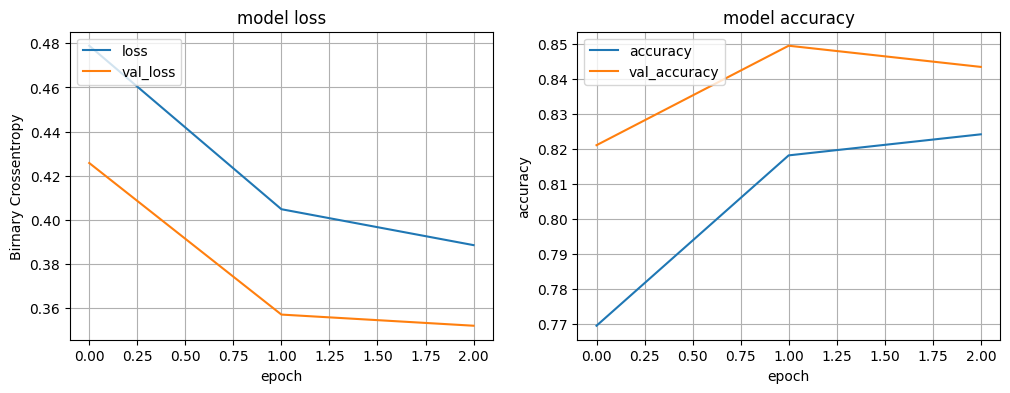

119/119 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8433
Epoch 1/3
463/463 [==============================] - 2s 3ms/step - loss: 0.6243 - accuracy: 0.6684 - val_loss: 0.6737 - val_accuracy: 0.6480
Epoch 2/3
463/463 [==============================] - 2s 3ms/step - loss: 0.6779 - accuracy: 0.5868 - val_loss: 0.5360 - val_accuracy: 0.6753
Epoch 3/3
463/463 [==============================] - 2s 4ms/step - loss: 0.6434 - accuracy: 0.6380 - val_loss: 0.5483 - val_accuracy: 0.6632
num_nodes: 32, dropout_prob: 0.3, lr: 0.1, batch_size: 32


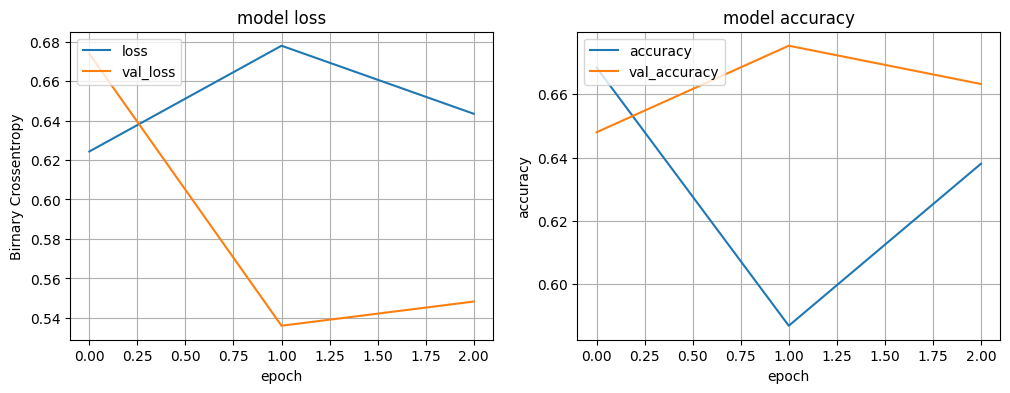

119/119 [==============================] - 0s 3ms/step - loss: 0.5483 - accuracy: 0.6632
Epoch 1/3
232/232 [==============================] - 2s 3ms/step - loss: 0.5286 - accuracy: 0.7431 - val_loss: 0.4738 - val_accuracy: 0.7505
Epoch 2/3
232/232 [==============================] - 1s 3ms/step - loss: 0.5698 - accuracy: 0.7139 - val_loss: 0.4685 - val_accuracy: 0.7823
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 0.6193 - accuracy: 0.6515 - val_loss: 0.4368 - val_accuracy: 0.8197
num_nodes: 32, dropout_prob: 0.3, lr: 0.1, batch_size: 64


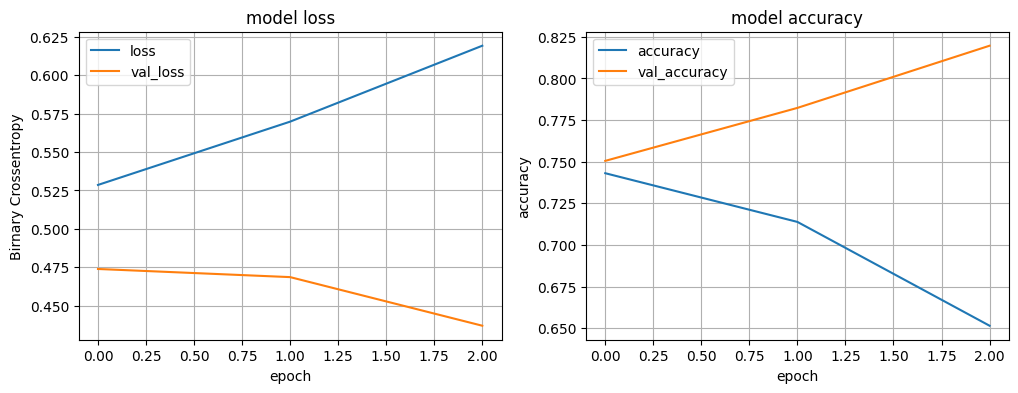

119/119 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8197
Epoch 1/3
116/116 [==============================] - 1s 4ms/step - loss: 0.5189 - accuracy: 0.7400 - val_loss: 0.4322 - val_accuracy: 0.8362
Epoch 2/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4750 - accuracy: 0.7718 - val_loss: 0.4394 - val_accuracy: 0.8488
Epoch 3/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.7627 - val_loss: 0.4697 - val_accuracy: 0.8444
num_nodes: 32, dropout_prob: 0.3, lr: 0.1, batch_size: 128


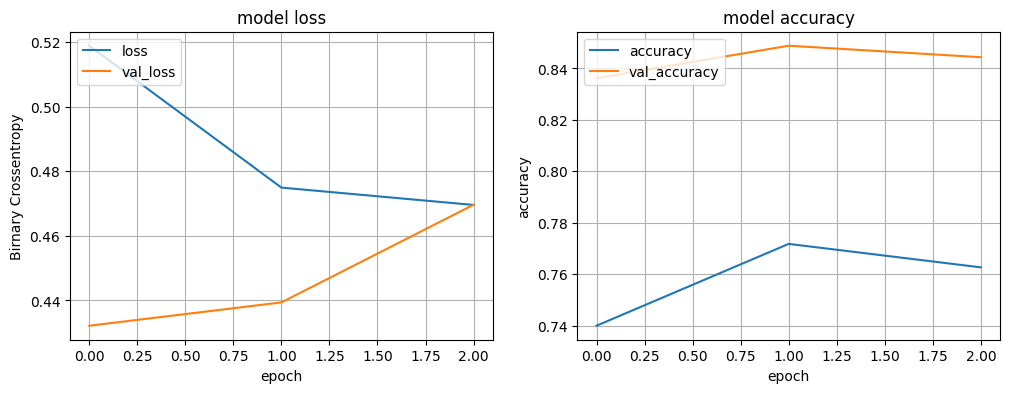

119/119 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8444
Epoch 1/3
463/463 [==============================] - 2s 3ms/step - loss: 0.4406 - accuracy: 0.7900 - val_loss: 0.3868 - val_accuracy: 0.8336
Epoch 2/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3831 - accuracy: 0.8260 - val_loss: 0.3545 - val_accuracy: 0.8478
Epoch 3/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3680 - accuracy: 0.8372 - val_loss: 0.3419 - val_accuracy: 0.8562
num_nodes: 64, dropout_prob: 0.1, lr: 0.001, batch_size: 32


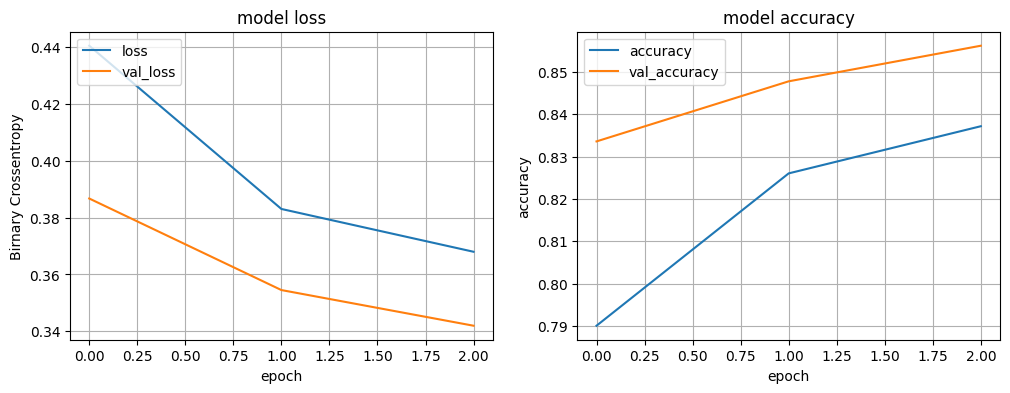

119/119 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8562
Epoch 1/3
232/232 [==============================] - 2s 4ms/step - loss: 0.4826 - accuracy: 0.7678 - val_loss: 0.3901 - val_accuracy: 0.8323
Epoch 2/3
232/232 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8181 - val_loss: 0.3691 - val_accuracy: 0.8441
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 0.3841 - accuracy: 0.8249 - val_loss: 0.3669 - val_accuracy: 0.8465
num_nodes: 64, dropout_prob: 0.1, lr: 0.001, batch_size: 64


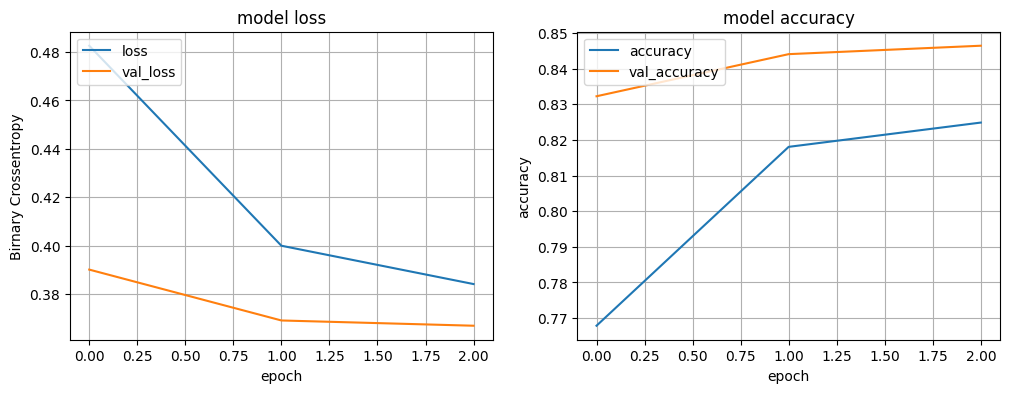

119/119 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8465
Epoch 1/3
116/116 [==============================] - 2s 5ms/step - loss: 0.5065 - accuracy: 0.7552 - val_loss: 0.4112 - val_accuracy: 0.8183
Epoch 2/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4154 - accuracy: 0.8092 - val_loss: 0.3916 - val_accuracy: 0.8394
Epoch 3/3
116/116 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.8192 - val_loss: 0.3644 - val_accuracy: 0.8507
num_nodes: 64, dropout_prob: 0.1, lr: 0.001, batch_size: 128


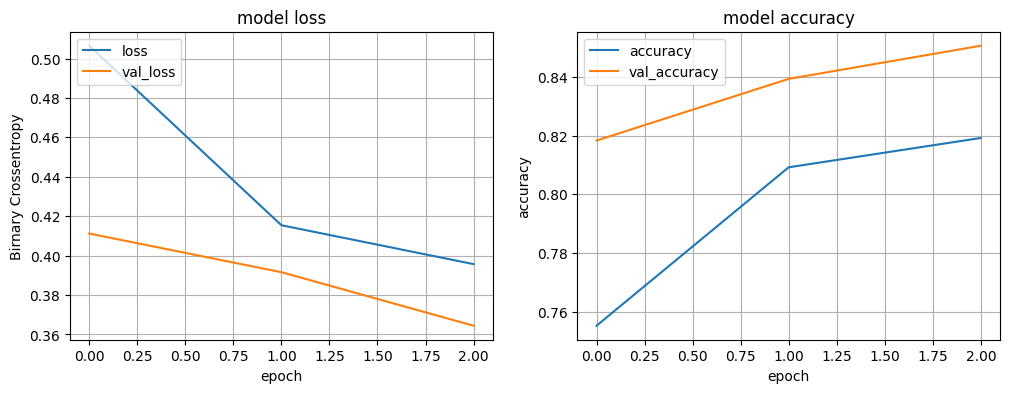

119/119 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 0.8507
Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.4030 - accuracy: 0.8170 - val_loss: 0.3645 - val_accuracy: 0.8226
Epoch 2/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3698 - accuracy: 0.8321 - val_loss: 0.3336 - val_accuracy: 0.8601
Epoch 3/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3620 - accuracy: 0.8385 - val_loss: 0.3596 - val_accuracy: 0.8502
num_nodes: 64, dropout_prob: 0.1, lr: 0.01, batch_size: 32


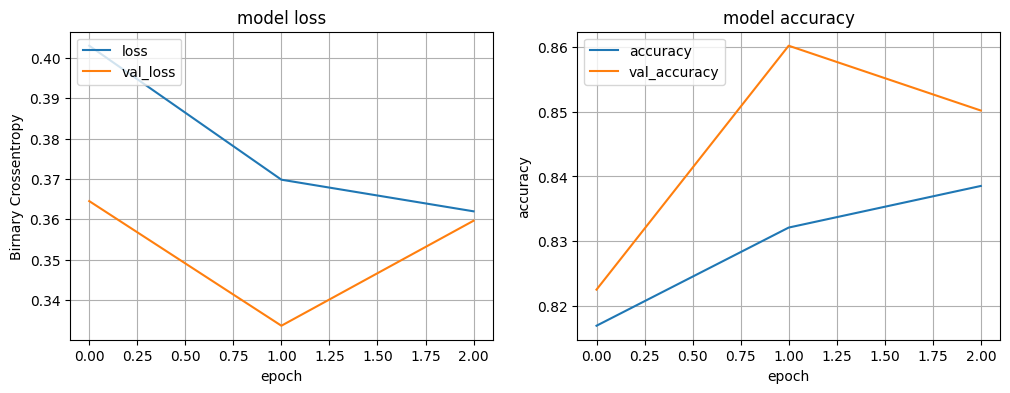

119/119 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8502
Epoch 1/3
232/232 [==============================] - 2s 4ms/step - loss: 0.4112 - accuracy: 0.8079 - val_loss: 0.3694 - val_accuracy: 0.8444
Epoch 2/3
232/232 [==============================] - 1s 3ms/step - loss: 0.3655 - accuracy: 0.8333 - val_loss: 0.3442 - val_accuracy: 0.8670
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 0.3561 - accuracy: 0.8393 - val_loss: 0.3451 - val_accuracy: 0.8530
num_nodes: 64, dropout_prob: 0.1, lr: 0.01, batch_size: 64


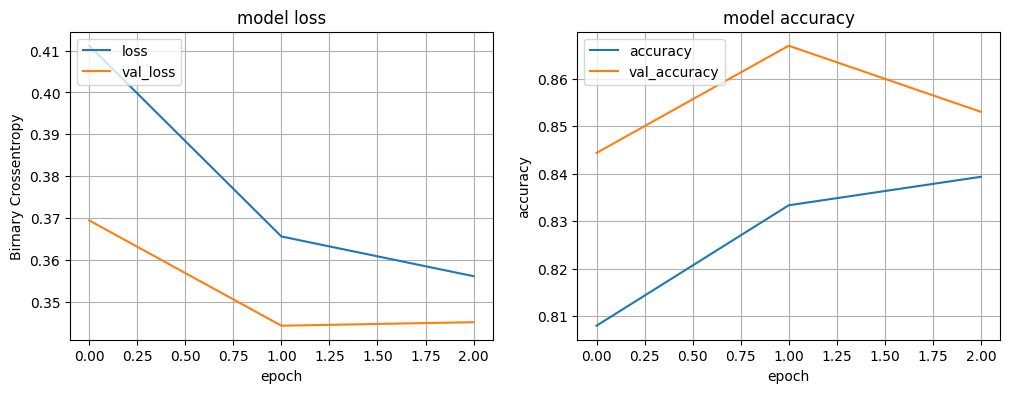

119/119 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8530
Epoch 1/3
116/116 [==============================] - 1s 5ms/step - loss: 0.4232 - accuracy: 0.8025 - val_loss: 0.3795 - val_accuracy: 0.8431
Epoch 2/3
116/116 [==============================] - 0s 4ms/step - loss: 0.3673 - accuracy: 0.8356 - val_loss: 0.3536 - val_accuracy: 0.8475
Epoch 3/3
116/116 [==============================] - 0s 4ms/step - loss: 0.3558 - accuracy: 0.8444 - val_loss: 0.3406 - val_accuracy: 0.8557
num_nodes: 64, dropout_prob: 0.1, lr: 0.01, batch_size: 128


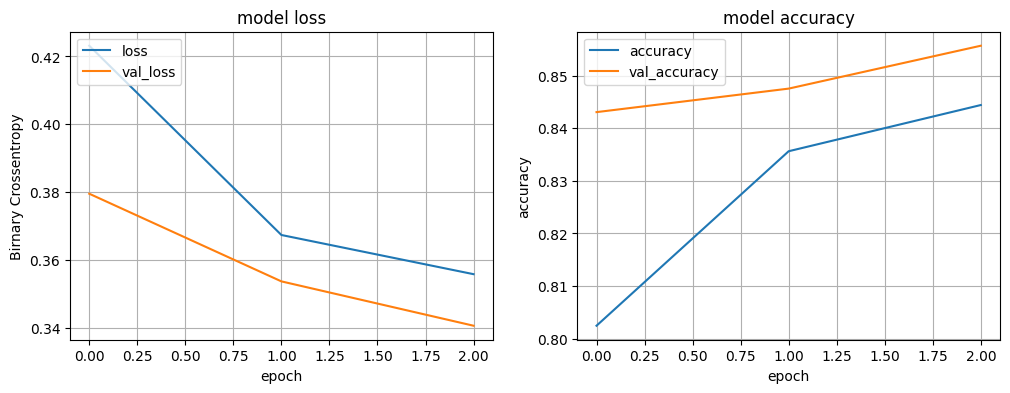

119/119 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8557
Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.5731 - accuracy: 0.6948 - val_loss: 0.6383 - val_accuracy: 0.7111
Epoch 2/3
463/463 [==============================] - 1s 3ms/step - loss: 0.6540 - accuracy: 0.6252 - val_loss: 0.6582 - val_accuracy: 0.7326
Epoch 3/3
463/463 [==============================] - 2s 3ms/step - loss: 0.6396 - accuracy: 0.6353 - val_loss: 0.6188 - val_accuracy: 0.7521
num_nodes: 64, dropout_prob: 0.1, lr: 0.1, batch_size: 32


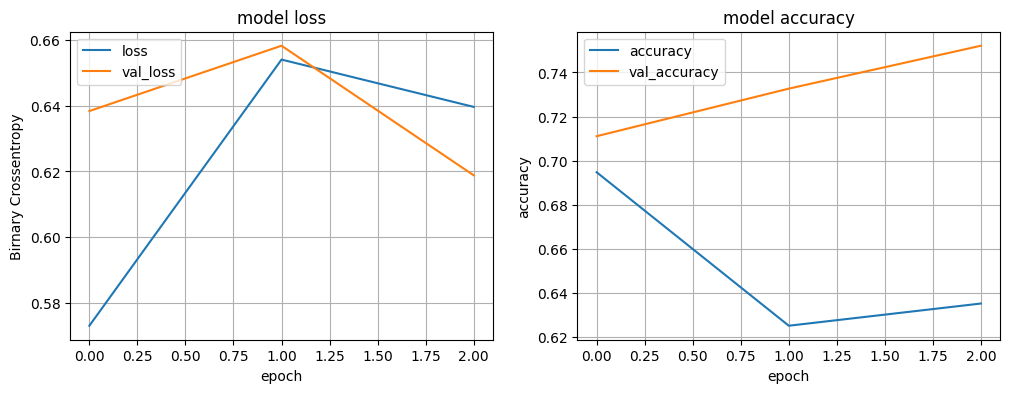

119/119 [==============================] - 0s 3ms/step - loss: 0.6188 - accuracy: 0.7521
Epoch 1/3
232/232 [==============================] - 2s 5ms/step - loss: 0.4730 - accuracy: 0.7825 - val_loss: 0.3920 - val_accuracy: 0.8449
Epoch 2/3
232/232 [==============================] - 1s 5ms/step - loss: 0.4662 - accuracy: 0.7810 - val_loss: 0.4848 - val_accuracy: 0.8354
Epoch 3/3
232/232 [==============================] - 1s 4ms/step - loss: 0.5398 - accuracy: 0.7246 - val_loss: 0.4961 - val_accuracy: 0.7282
num_nodes: 64, dropout_prob: 0.1, lr: 0.1, batch_size: 64


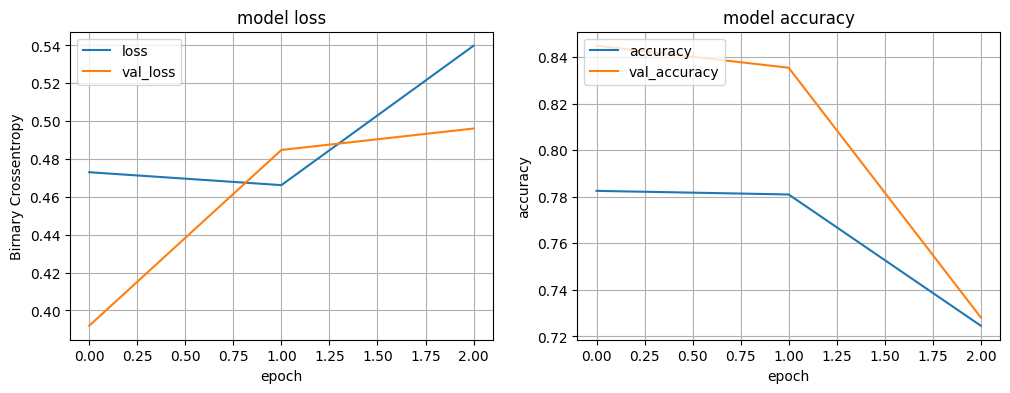

119/119 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7282
Epoch 1/3
116/116 [==============================] - 1s 5ms/step - loss: 0.4787 - accuracy: 0.7771 - val_loss: 0.4147 - val_accuracy: 0.8118
Epoch 2/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8112 - val_loss: 0.4761 - val_accuracy: 0.7813
Epoch 3/3
116/116 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.8048 - val_loss: 0.3490 - val_accuracy: 0.8541
num_nodes: 64, dropout_prob: 0.1, lr: 0.1, batch_size: 128


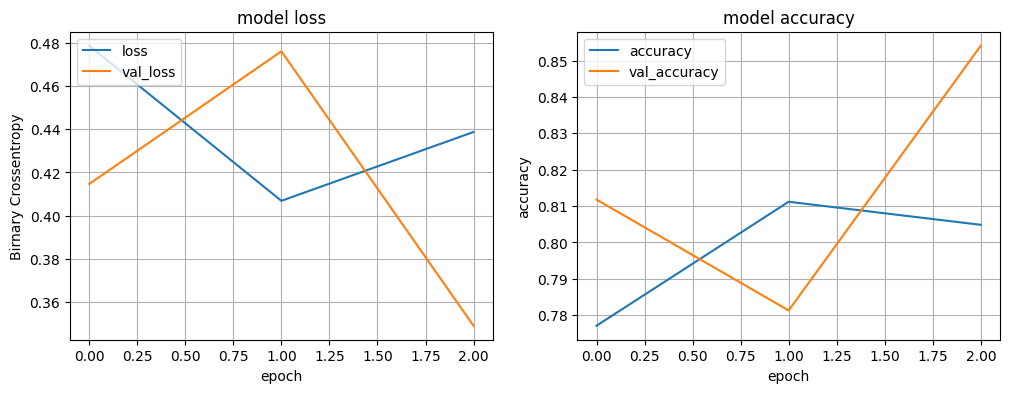

119/119 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8541
Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.4681 - accuracy: 0.7778 - val_loss: 0.4135 - val_accuracy: 0.8186
Epoch 2/3
463/463 [==============================] - 2s 4ms/step - loss: 0.4050 - accuracy: 0.8153 - val_loss: 0.3676 - val_accuracy: 0.8410
Epoch 3/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3871 - accuracy: 0.8262 - val_loss: 0.3499 - val_accuracy: 0.8491
num_nodes: 64, dropout_prob: 0.2, lr: 0.001, batch_size: 32


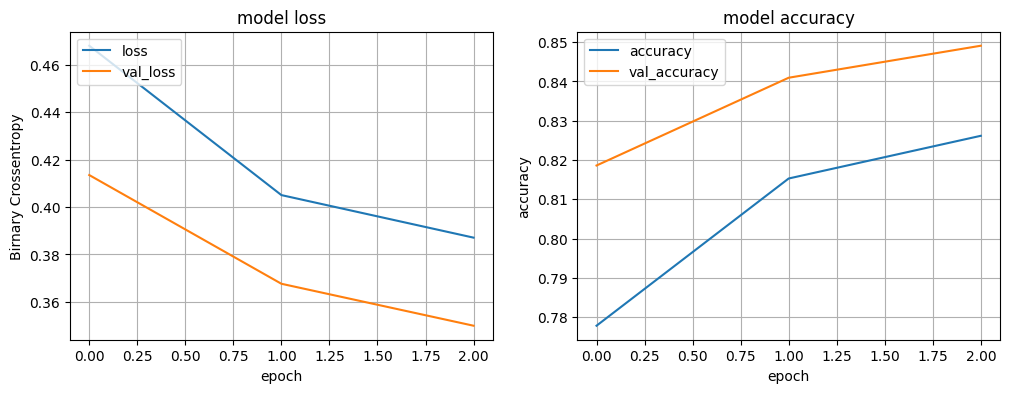

119/119 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8491
Epoch 1/3
232/232 [==============================] - 2s 4ms/step - loss: 0.4922 - accuracy: 0.7611 - val_loss: 0.4036 - val_accuracy: 0.8268
Epoch 2/3
232/232 [==============================] - 1s 3ms/step - loss: 0.4198 - accuracy: 0.8040 - val_loss: 0.3896 - val_accuracy: 0.8357
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 0.3985 - accuracy: 0.8168 - val_loss: 0.3780 - val_accuracy: 0.8423
num_nodes: 64, dropout_prob: 0.2, lr: 0.001, batch_size: 64


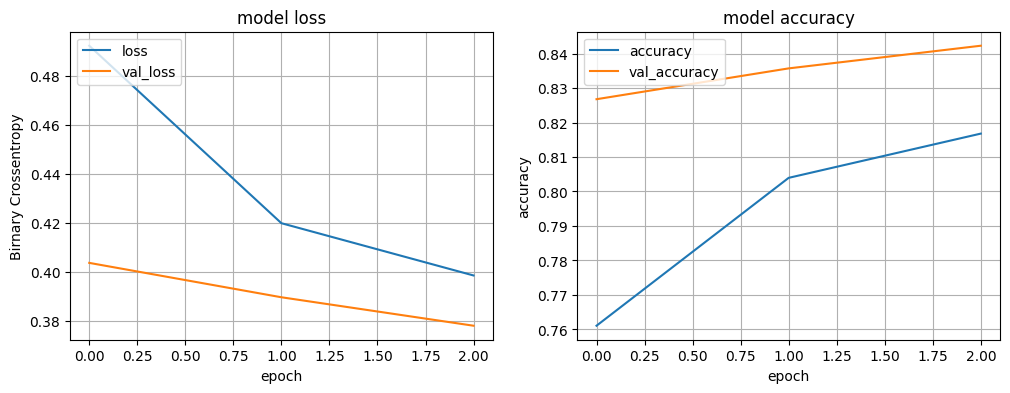

119/119 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8423
Epoch 1/3
116/116 [==============================] - 1s 5ms/step - loss: 0.5167 - accuracy: 0.7400 - val_loss: 0.4383 - val_accuracy: 0.8052
Epoch 2/3
116/116 [==============================] - 0s 4ms/step - loss: 0.4297 - accuracy: 0.7969 - val_loss: 0.4161 - val_accuracy: 0.8181
Epoch 3/3
116/116 [==============================] - 0s 4ms/step - loss: 0.4049 - accuracy: 0.8159 - val_loss: 0.3970 - val_accuracy: 0.8331
num_nodes: 64, dropout_prob: 0.2, lr: 0.001, batch_size: 128


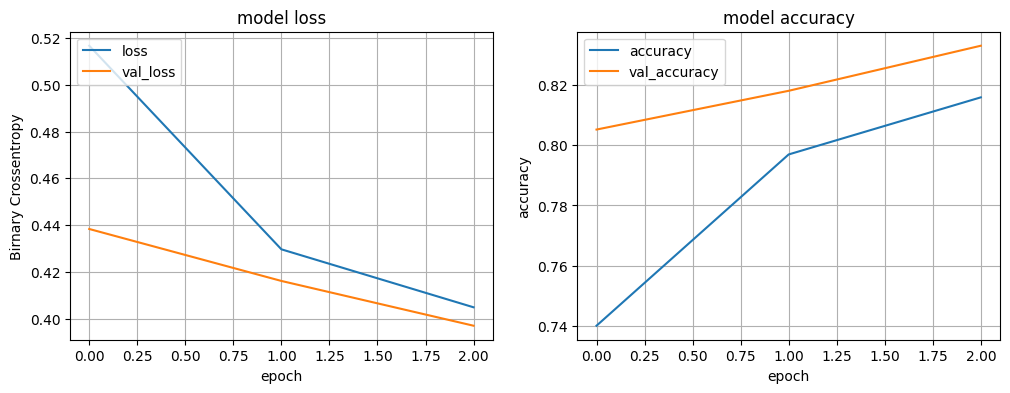

119/119 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8331
Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.4202 - accuracy: 0.8061 - val_loss: 0.4074 - val_accuracy: 0.8365
Epoch 2/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3829 - accuracy: 0.8293 - val_loss: 0.3442 - val_accuracy: 0.8567
Epoch 3/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3708 - accuracy: 0.8310 - val_loss: 0.3366 - val_accuracy: 0.8625
num_nodes: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 32


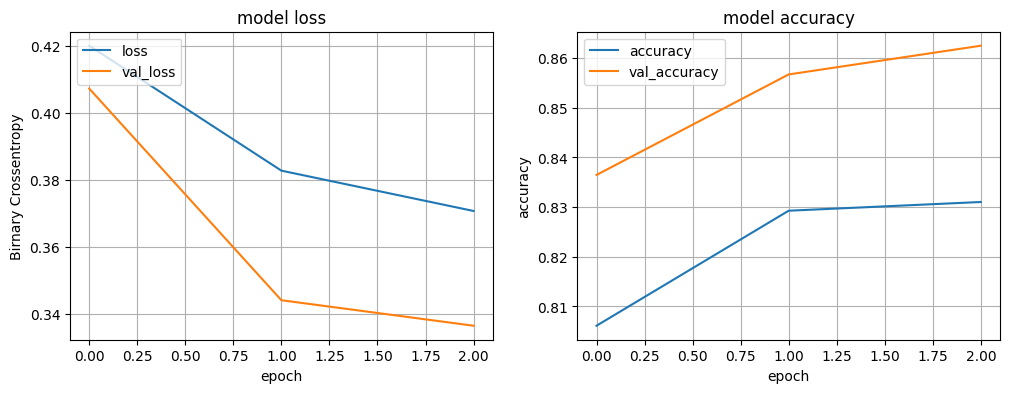

119/119 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8625
Epoch 1/3
232/232 [==============================] - 2s 4ms/step - loss: 0.4221 - accuracy: 0.8063 - val_loss: 0.3647 - val_accuracy: 0.8467
Epoch 2/3
232/232 [==============================] - 1s 3ms/step - loss: 0.3778 - accuracy: 0.8296 - val_loss: 0.3611 - val_accuracy: 0.8486
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 0.3658 - accuracy: 0.8356 - val_loss: 0.3492 - val_accuracy: 0.8565
num_nodes: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 64


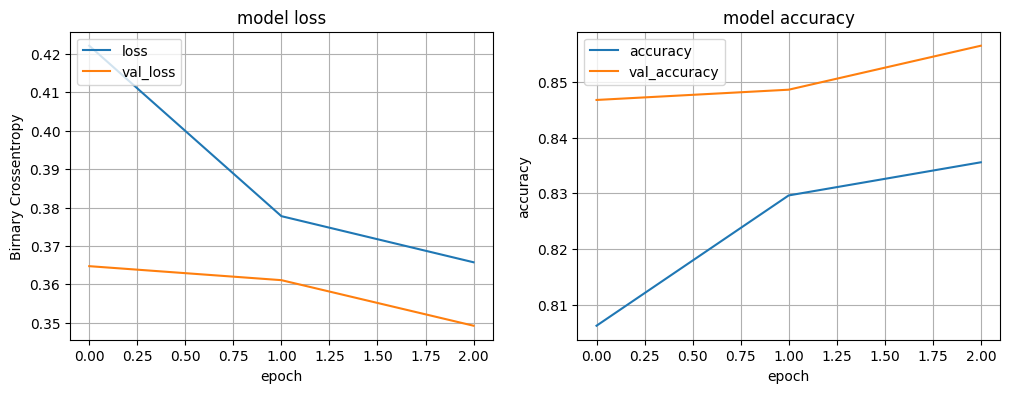

119/119 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8565
Epoch 1/3
116/116 [==============================] - 1s 5ms/step - loss: 0.4350 - accuracy: 0.8001 - val_loss: 0.3830 - val_accuracy: 0.8352
Epoch 2/3
116/116 [==============================] - 0s 4ms/step - loss: 0.3799 - accuracy: 0.8291 - val_loss: 0.3655 - val_accuracy: 0.8494
Epoch 3/3
116/116 [==============================] - 0s 4ms/step - loss: 0.3630 - accuracy: 0.8360 - val_loss: 0.3505 - val_accuracy: 0.8473
num_nodes: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 128


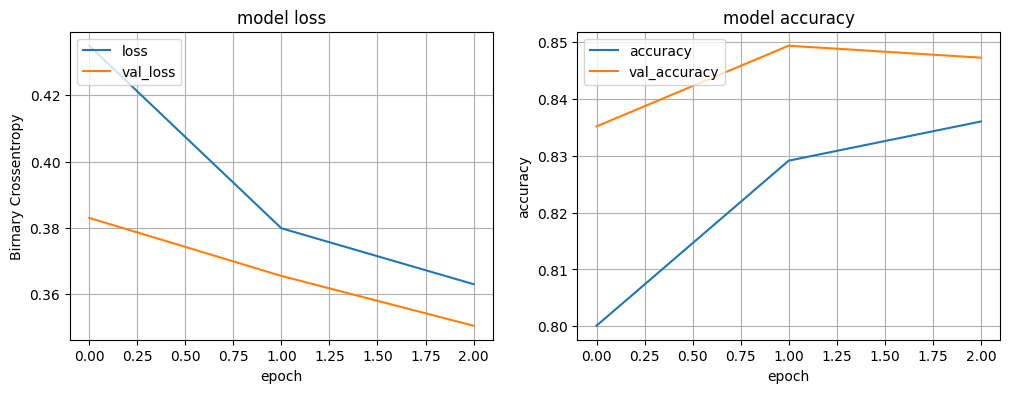

119/119 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8473
Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.6277 - accuracy: 0.6763 - val_loss: 0.5773 - val_accuracy: 0.7545
Epoch 2/3
463/463 [==============================] - 2s 4ms/step - loss: 0.7015 - accuracy: 0.5582 - val_loss: 0.6764 - val_accuracy: 0.6451
Epoch 3/3
463/463 [==============================] - 2s 3ms/step - loss: 0.6969 - accuracy: 0.5022 - val_loss: 0.7086 - val_accuracy: 0.3549
num_nodes: 64, dropout_prob: 0.2, lr: 0.1, batch_size: 32


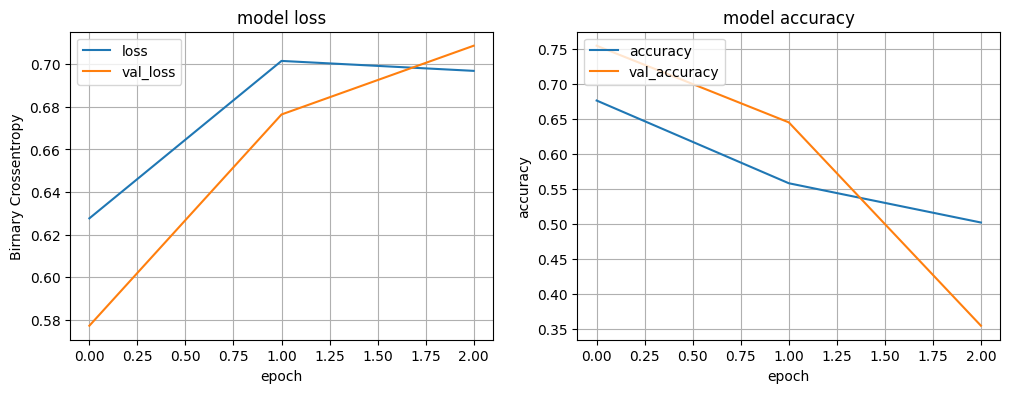

119/119 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.3549
Epoch 1/3
232/232 [==============================] - 2s 4ms/step - loss: 0.5258 - accuracy: 0.7481 - val_loss: 0.4123 - val_accuracy: 0.8262
Epoch 2/3
232/232 [==============================] - 1s 3ms/step - loss: 0.5449 - accuracy: 0.7251 - val_loss: 0.4909 - val_accuracy: 0.8289
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 0.6286 - accuracy: 0.6695 - val_loss: 0.5211 - val_accuracy: 0.6632
num_nodes: 64, dropout_prob: 0.2, lr: 0.1, batch_size: 64


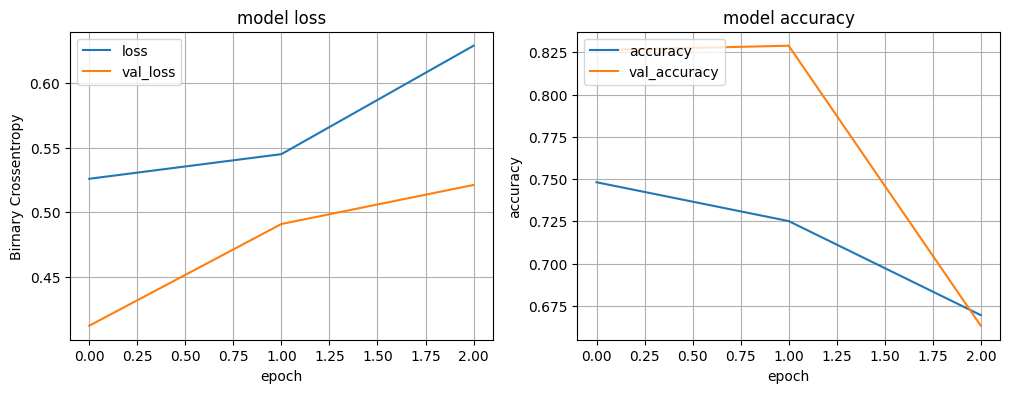

119/119 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.6632
Epoch 1/3
116/116 [==============================] - 1s 5ms/step - loss: 0.5202 - accuracy: 0.7535 - val_loss: 0.4359 - val_accuracy: 0.8454
Epoch 2/3
116/116 [==============================] - 0s 4ms/step - loss: 0.4180 - accuracy: 0.8074 - val_loss: 0.4159 - val_accuracy: 0.8297
Epoch 3/3
116/116 [==============================] - 1s 4ms/step - loss: 0.4173 - accuracy: 0.8075 - val_loss: 0.3725 - val_accuracy: 0.8268
num_nodes: 64, dropout_prob: 0.2, lr: 0.1, batch_size: 128


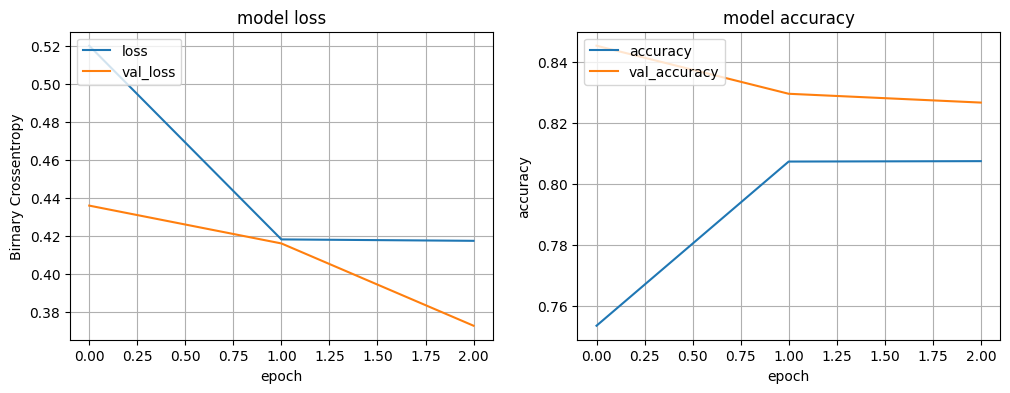

119/119 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8268
Epoch 1/3
463/463 [==============================] - 2s 3ms/step - loss: 0.4674 - accuracy: 0.7774 - val_loss: 0.4059 - val_accuracy: 0.8178
Epoch 2/3
463/463 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8108 - val_loss: 0.3749 - val_accuracy: 0.8381
Epoch 3/3
463/463 [==============================] - 1s 3ms/step - loss: 0.3927 - accuracy: 0.8217 - val_loss: 0.3551 - val_accuracy: 0.8449
num_nodes: 64, dropout_prob: 0.3, lr: 0.001, batch_size: 32


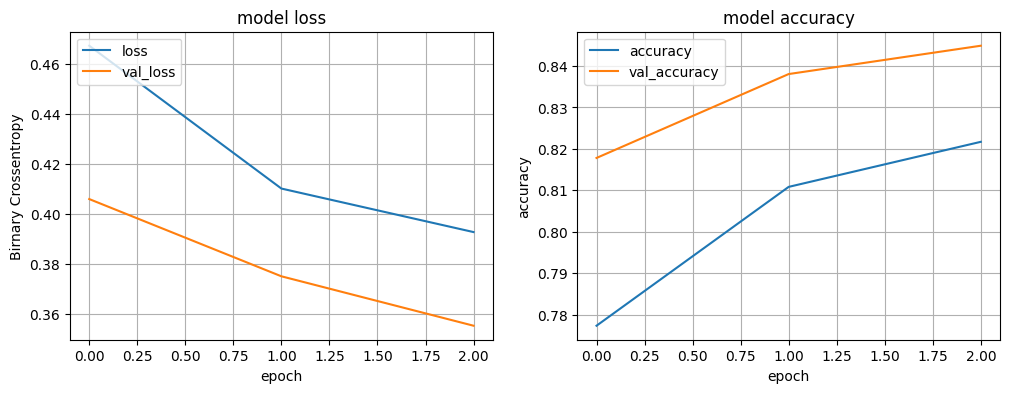

119/119 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8449
Epoch 1/3
232/232 [==============================] - 2s 4ms/step - loss: 0.4983 - accuracy: 0.7520 - val_loss: 0.4093 - val_accuracy: 0.8194
Epoch 2/3
232/232 [==============================] - 1s 3ms/step - loss: 0.4276 - accuracy: 0.8033 - val_loss: 0.3772 - val_accuracy: 0.8368
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 0.4046 - accuracy: 0.8156 - val_loss: 0.3588 - val_accuracy: 0.8523
num_nodes: 64, dropout_prob: 0.3, lr: 0.001, batch_size: 64


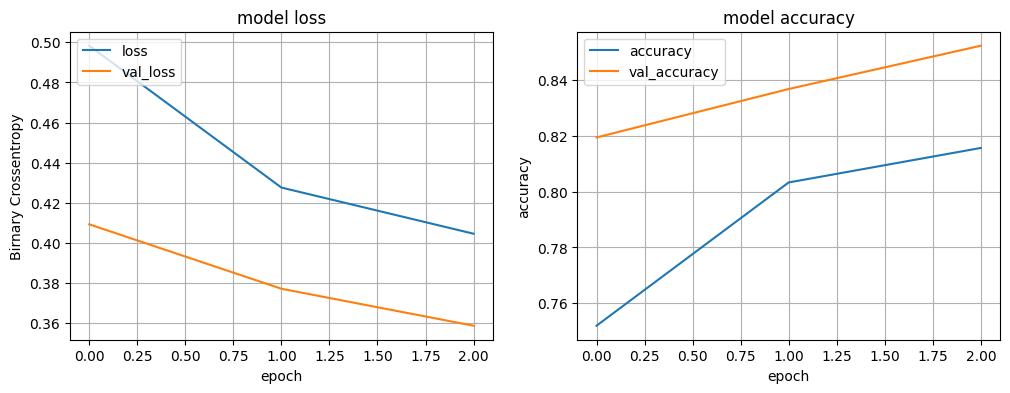

119/119 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8523
Epoch 1/3
116/116 [==============================] - 2s 6ms/step - loss: 0.5454 - accuracy: 0.7162 - val_loss: 0.4462 - val_accuracy: 0.7978
Epoch 2/3
116/116 [==============================] - 1s 5ms/step - loss: 0.4471 - accuracy: 0.7882 - val_loss: 0.4039 - val_accuracy: 0.8270
Epoch 3/3
116/116 [==============================] - 1s 4ms/step - loss: 0.4253 - accuracy: 0.8027 - val_loss: 0.3945 - val_accuracy: 0.8278
num_nodes: 64, dropout_prob: 0.3, lr: 0.001, batch_size: 128


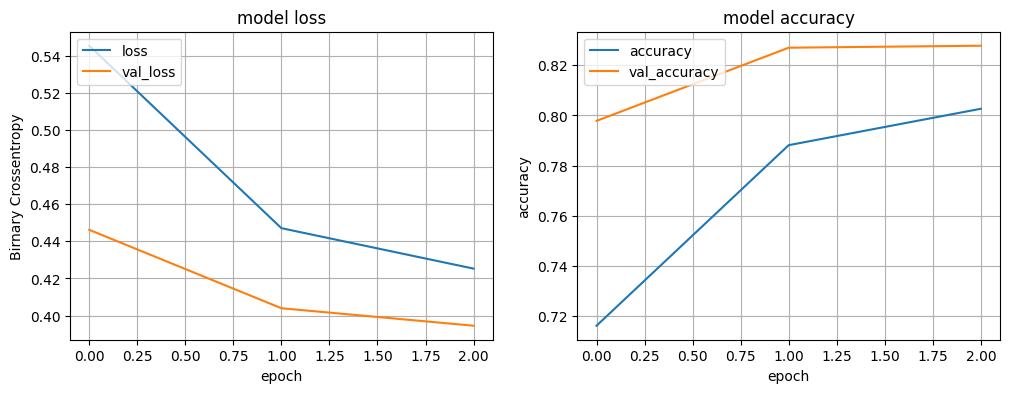

119/119 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8278
Epoch 1/3
463/463 [==============================] - 3s 3ms/step - loss: 0.4314 - accuracy: 0.8005 - val_loss: 0.3956 - val_accuracy: 0.8381
Epoch 2/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3932 - accuracy: 0.8241 - val_loss: 0.3609 - val_accuracy: 0.8512
Epoch 3/3
463/463 [==============================] - 1s 3ms/step - loss: 0.3784 - accuracy: 0.8287 - val_loss: 0.3607 - val_accuracy: 0.8467
num_nodes: 64, dropout_prob: 0.3, lr: 0.01, batch_size: 32


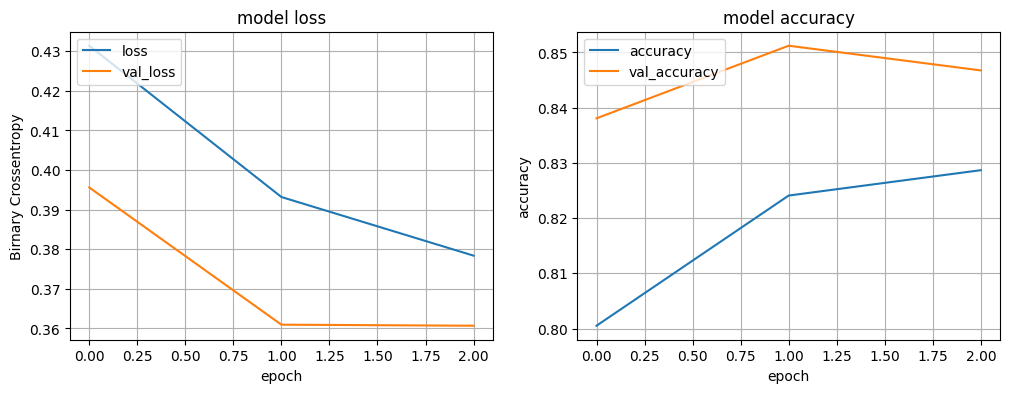

119/119 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8467
Epoch 1/3
232/232 [==============================] - 2s 4ms/step - loss: 0.4313 - accuracy: 0.7975 - val_loss: 0.3660 - val_accuracy: 0.8423
Epoch 2/3
232/232 [==============================] - 1s 3ms/step - loss: 0.3851 - accuracy: 0.8277 - val_loss: 0.3603 - val_accuracy: 0.8565
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 0.3763 - accuracy: 0.8325 - val_loss: 0.3640 - val_accuracy: 0.8517
num_nodes: 64, dropout_prob: 0.3, lr: 0.01, batch_size: 64


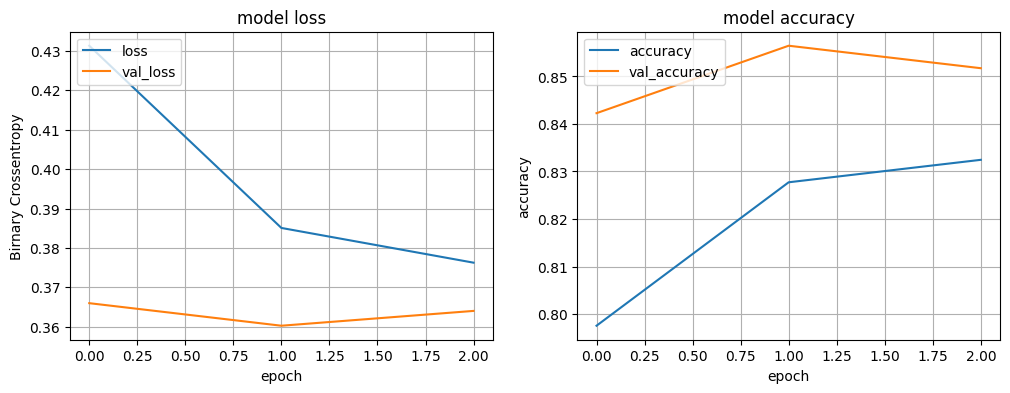

119/119 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8517
Epoch 1/3
116/116 [==============================] - 2s 7ms/step - loss: 0.4443 - accuracy: 0.7925 - val_loss: 0.3985 - val_accuracy: 0.8302
Epoch 2/3
116/116 [==============================] - 0s 4ms/step - loss: 0.3894 - accuracy: 0.8271 - val_loss: 0.3504 - val_accuracy: 0.8538
Epoch 3/3
116/116 [==============================] - 0s 4ms/step - loss: 0.3776 - accuracy: 0.8312 - val_loss: 0.3572 - val_accuracy: 0.8491
num_nodes: 64, dropout_prob: 0.3, lr: 0.01, batch_size: 128


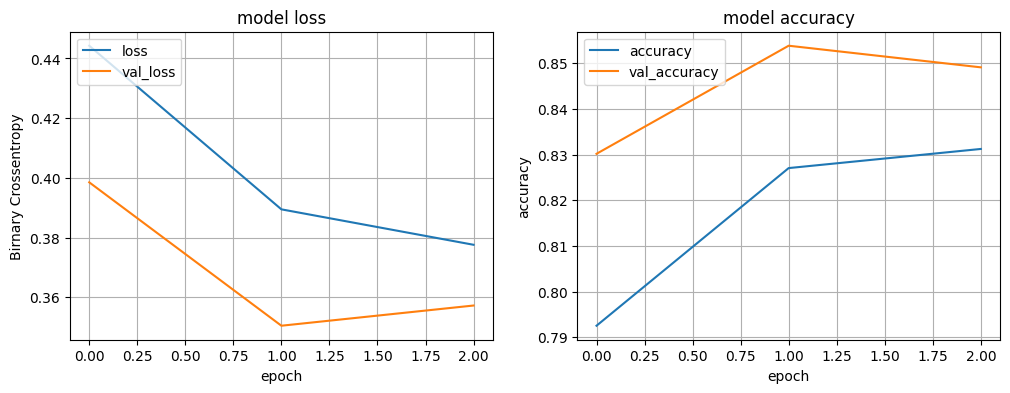

119/119 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8491
Epoch 1/3
463/463 [==============================] - 3s 3ms/step - loss: 0.7152 - accuracy: 0.6594 - val_loss: 1.4587 - val_accuracy: 0.7553
Epoch 2/3
463/463 [==============================] - 1s 3ms/step - loss: 0.7385 - accuracy: 0.5379 - val_loss: 0.6940 - val_accuracy: 0.3549
Epoch 3/3
463/463 [==============================] - 1s 3ms/step - loss: 0.7377 - accuracy: 0.5108 - val_loss: 0.7282 - val_accuracy: 0.3549
num_nodes: 64, dropout_prob: 0.3, lr: 0.1, batch_size: 32


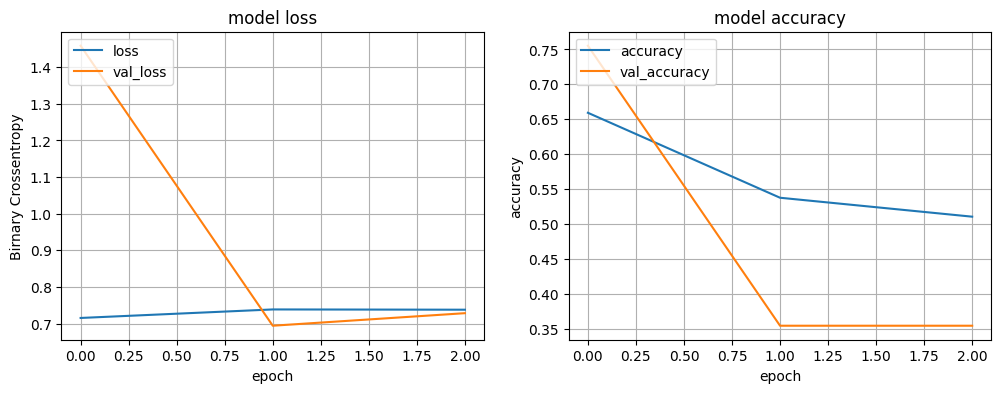

119/119 [==============================] - 0s 2ms/step - loss: 0.7282 - accuracy: 0.3549
Epoch 1/3
232/232 [==============================] - 2s 4ms/step - loss: 0.5711 - accuracy: 0.7046 - val_loss: 0.4441 - val_accuracy: 0.7503
Epoch 2/3
232/232 [==============================] - 1s 4ms/step - loss: 0.5788 - accuracy: 0.6946 - val_loss: 0.5882 - val_accuracy: 0.5739
Epoch 3/3
232/232 [==============================] - 1s 4ms/step - loss: 0.6312 - accuracy: 0.6431 - val_loss: 0.6429 - val_accuracy: 0.5318
num_nodes: 64, dropout_prob: 0.3, lr: 0.1, batch_size: 64


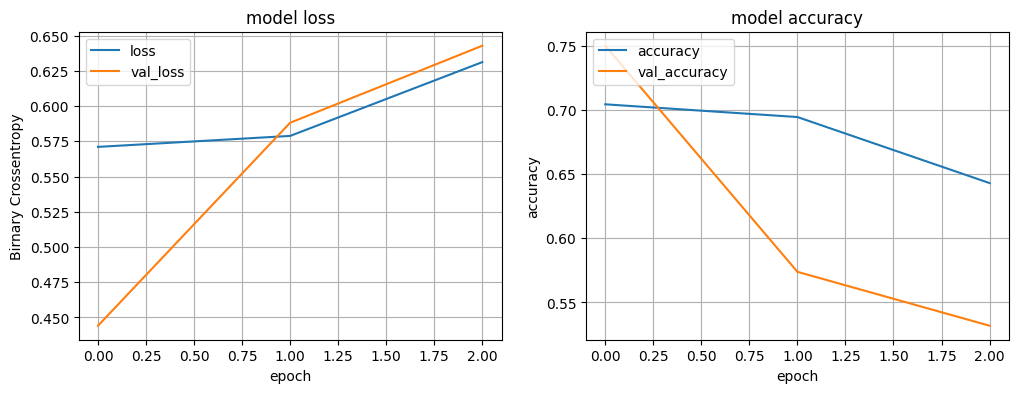

119/119 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.5318
Epoch 1/3
116/116 [==============================] - 1s 5ms/step - loss: 0.5312 - accuracy: 0.7441 - val_loss: 0.4387 - val_accuracy: 0.8097
Epoch 2/3
116/116 [==============================] - 0s 4ms/step - loss: 0.4831 - accuracy: 0.7711 - val_loss: 0.4307 - val_accuracy: 0.7668
Epoch 3/3
116/116 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.7486 - val_loss: 0.4860 - val_accuracy: 0.7292
num_nodes: 64, dropout_prob: 0.3, lr: 0.1, batch_size: 128


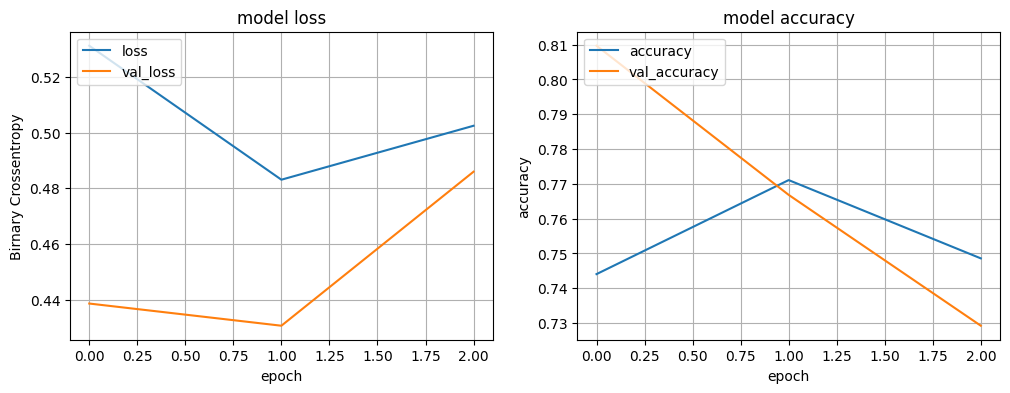

119/119 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7292
Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.4240 - accuracy: 0.8030 - val_loss: 0.3677 - val_accuracy: 0.8420
Epoch 2/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3715 - accuracy: 0.8337 - val_loss: 0.3525 - val_accuracy: 0.8499
Epoch 3/3
463/463 [==============================] - 2s 4ms/step - loss: 0.3576 - accuracy: 0.8405 - val_loss: 0.3409 - val_accuracy: 0.8575
num_nodes: 128, dropout_prob: 0.1, lr: 0.001, batch_size: 32


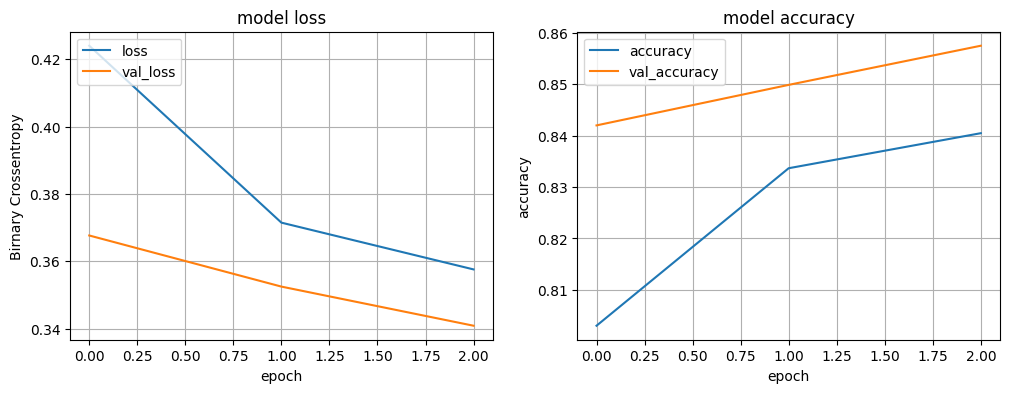

119/119 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8575
Epoch 1/3
232/232 [==============================] - 2s 4ms/step - loss: 0.4382 - accuracy: 0.7948 - val_loss: 0.3677 - val_accuracy: 0.8454
Epoch 2/3
232/232 [==============================] - 1s 4ms/step - loss: 0.3768 - accuracy: 0.8293 - val_loss: 0.3509 - val_accuracy: 0.8552
Epoch 3/3
232/232 [==============================] - 1s 4ms/step - loss: 0.3658 - accuracy: 0.8344 - val_loss: 0.3443 - val_accuracy: 0.8567
num_nodes: 128, dropout_prob: 0.1, lr: 0.001, batch_size: 64


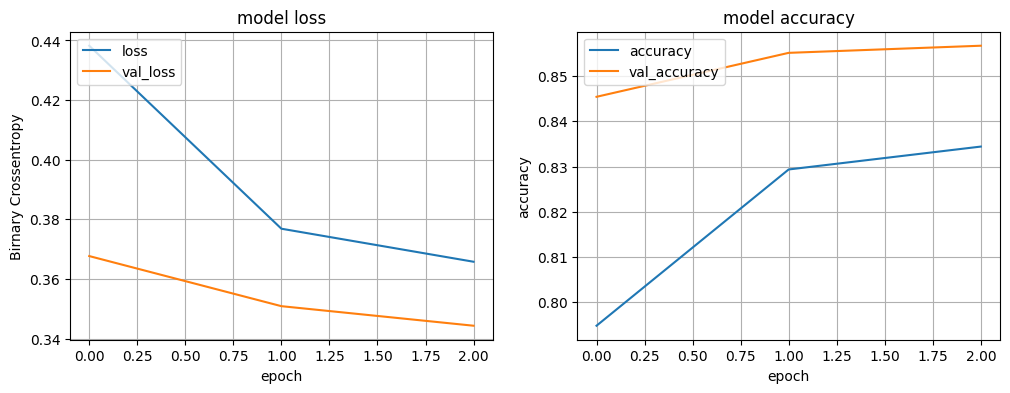

119/119 [==============================] - 0s 3ms/step - loss: 0.3443 - accuracy: 0.8567
Epoch 1/3
116/116 [==============================] - 2s 8ms/step - loss: 0.4550 - accuracy: 0.7867 - val_loss: 0.3910 - val_accuracy: 0.8360
Epoch 2/3
116/116 [==============================] - 1s 5ms/step - loss: 0.3853 - accuracy: 0.8289 - val_loss: 0.3737 - val_accuracy: 0.8444
Epoch 3/3
116/116 [==============================] - 1s 5ms/step - loss: 0.3684 - accuracy: 0.8354 - val_loss: 0.3550 - val_accuracy: 0.8473
num_nodes: 128, dropout_prob: 0.1, lr: 0.001, batch_size: 128


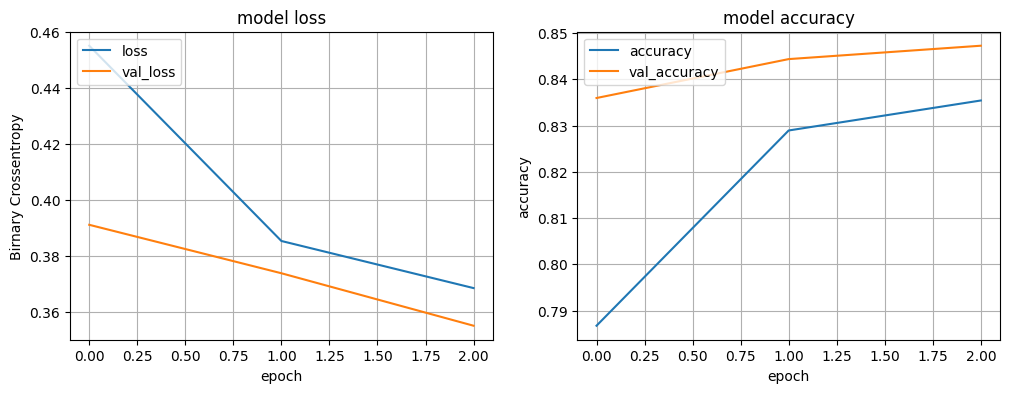

119/119 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8473
Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.4051 - accuracy: 0.8131 - val_loss: 0.3768 - val_accuracy: 0.8357
Epoch 2/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3669 - accuracy: 0.8346 - val_loss: 0.3556 - val_accuracy: 0.8538
Epoch 3/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3617 - accuracy: 0.8402 - val_loss: 0.3324 - val_accuracy: 0.8599
num_nodes: 128, dropout_prob: 0.1, lr: 0.01, batch_size: 32


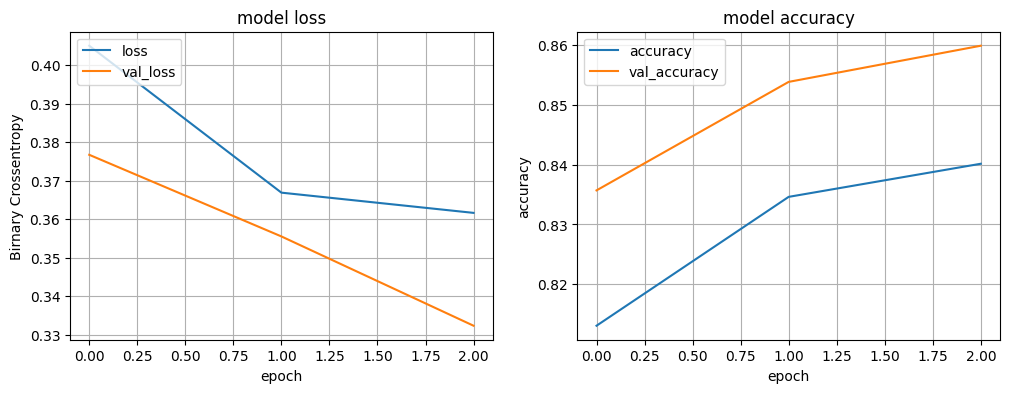

119/119 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8599
Epoch 1/3
232/232 [==============================] - 2s 5ms/step - loss: 0.4113 - accuracy: 0.8122 - val_loss: 0.3491 - val_accuracy: 0.8499
Epoch 2/3
232/232 [==============================] - 1s 4ms/step - loss: 0.3712 - accuracy: 0.8304 - val_loss: 0.3400 - val_accuracy: 0.8649
Epoch 3/3
232/232 [==============================] - 1s 4ms/step - loss: 0.3544 - accuracy: 0.8423 - val_loss: 0.3349 - val_accuracy: 0.8612
num_nodes: 128, dropout_prob: 0.1, lr: 0.01, batch_size: 64


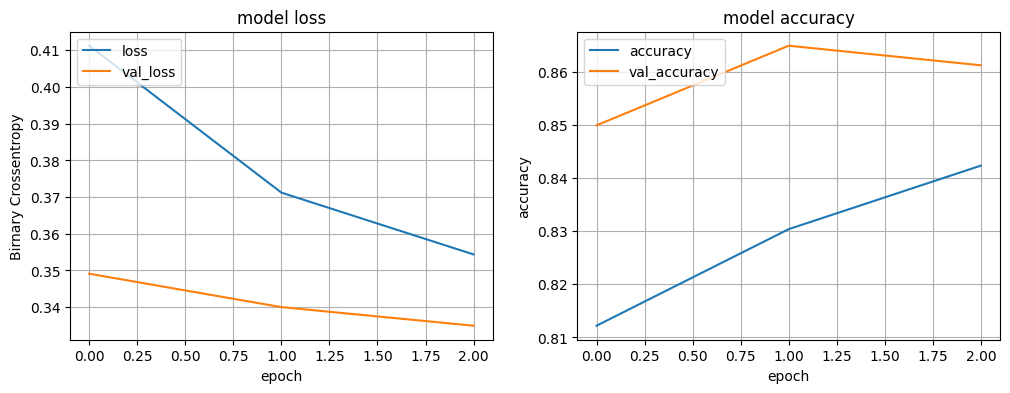

119/119 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8612
Epoch 1/3
116/116 [==============================] - 2s 8ms/step - loss: 0.3995 - accuracy: 0.8153 - val_loss: 0.3680 - val_accuracy: 0.8483
Epoch 2/3
116/116 [==============================] - 1s 6ms/step - loss: 0.3579 - accuracy: 0.8404 - val_loss: 0.3372 - val_accuracy: 0.8573
Epoch 3/3
116/116 [==============================] - 1s 5ms/step - loss: 0.3514 - accuracy: 0.8420 - val_loss: 0.3462 - val_accuracy: 0.8588
num_nodes: 128, dropout_prob: 0.1, lr: 0.01, batch_size: 128


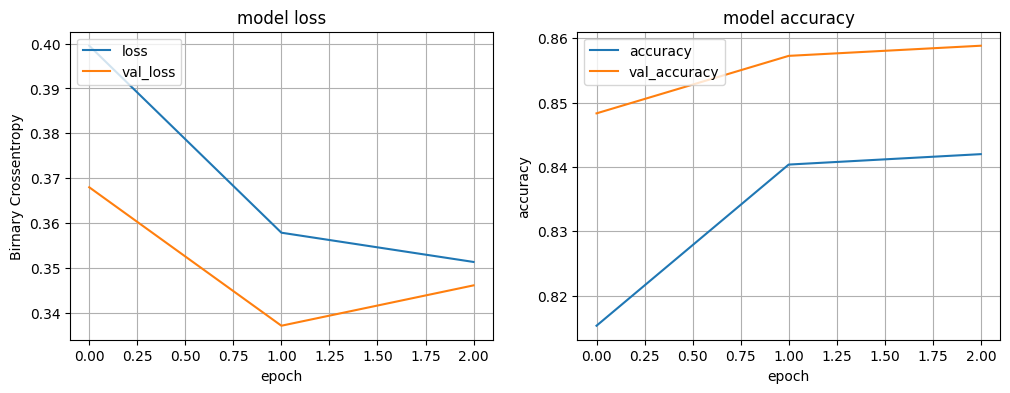

119/119 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8588
Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.5844 - accuracy: 0.7005 - val_loss: 0.5811 - val_accuracy: 0.7936
Epoch 2/3
463/463 [==============================] - 2s 4ms/step - loss: 0.6412 - accuracy: 0.6169 - val_loss: 1.2477 - val_accuracy: 0.7369
Epoch 3/3
463/463 [==============================] - 2s 3ms/step - loss: 0.7196 - accuracy: 0.5088 - val_loss: 0.7220 - val_accuracy: 0.3549
num_nodes: 128, dropout_prob: 0.1, lr: 0.1, batch_size: 32


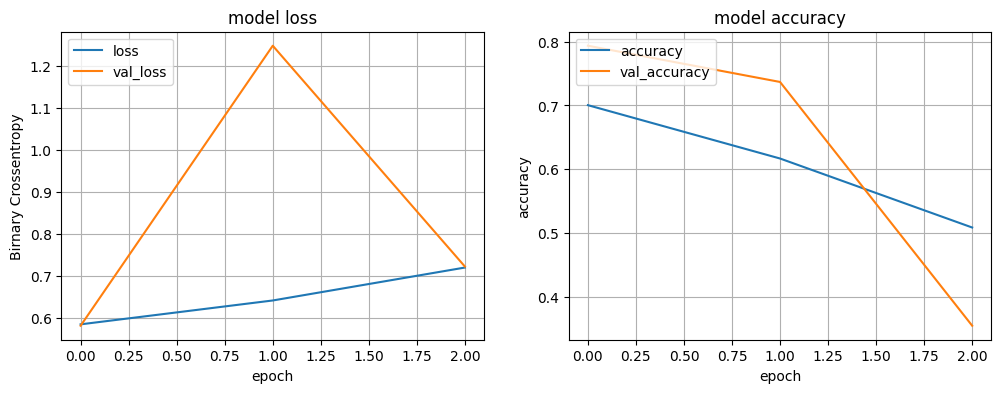

119/119 [==============================] - 0s 2ms/step - loss: 0.7220 - accuracy: 0.3549
Epoch 1/3
232/232 [==============================] - 2s 5ms/step - loss: 0.5067 - accuracy: 0.7709 - val_loss: 0.4115 - val_accuracy: 0.8173
Epoch 2/3
232/232 [==============================] - 1s 4ms/step - loss: 0.4857 - accuracy: 0.7526 - val_loss: 0.6767 - val_accuracy: 0.8102
Epoch 3/3
232/232 [==============================] - 1s 4ms/step - loss: 0.5826 - accuracy: 0.7195 - val_loss: 0.5220 - val_accuracy: 0.6551
num_nodes: 128, dropout_prob: 0.1, lr: 0.1, batch_size: 64


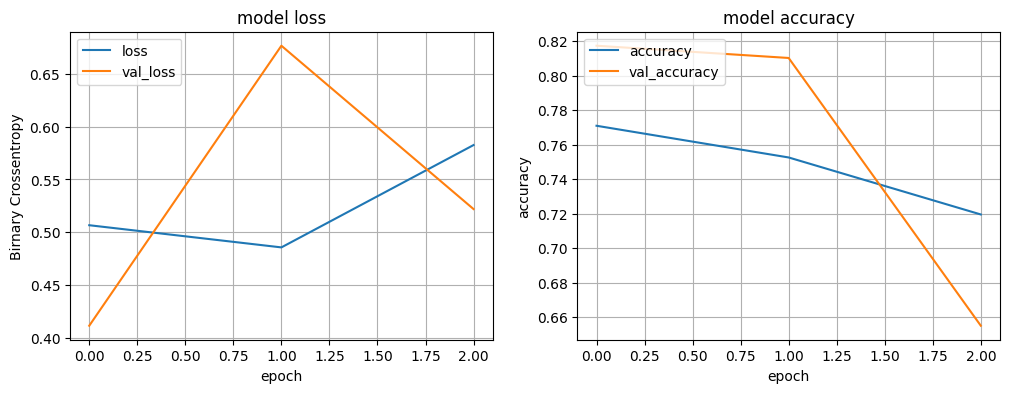

119/119 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.6551
Epoch 1/3
116/116 [==============================] - 2s 7ms/step - loss: 0.5380 - accuracy: 0.7676 - val_loss: 0.3950 - val_accuracy: 0.8247
Epoch 2/3
116/116 [==============================] - 1s 5ms/step - loss: 0.4140 - accuracy: 0.8058 - val_loss: 0.3708 - val_accuracy: 0.8244
Epoch 3/3
116/116 [==============================] - 1s 6ms/step - loss: 0.4095 - accuracy: 0.8150 - val_loss: 0.3788 - val_accuracy: 0.8247
num_nodes: 128, dropout_prob: 0.1, lr: 0.1, batch_size: 128


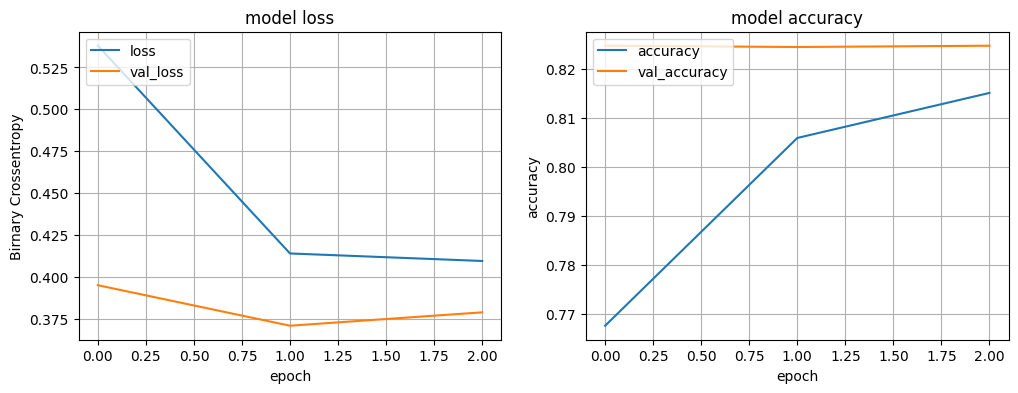

119/119 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8247
Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.4297 - accuracy: 0.8011 - val_loss: 0.3672 - val_accuracy: 0.8452
Epoch 2/3
463/463 [==============================] - 2s 4ms/step - loss: 0.3827 - accuracy: 0.8287 - val_loss: 0.3494 - val_accuracy: 0.8515
Epoch 3/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3642 - accuracy: 0.8361 - val_loss: 0.3449 - val_accuracy: 0.8538
num_nodes: 128, dropout_prob: 0.2, lr: 0.001, batch_size: 32


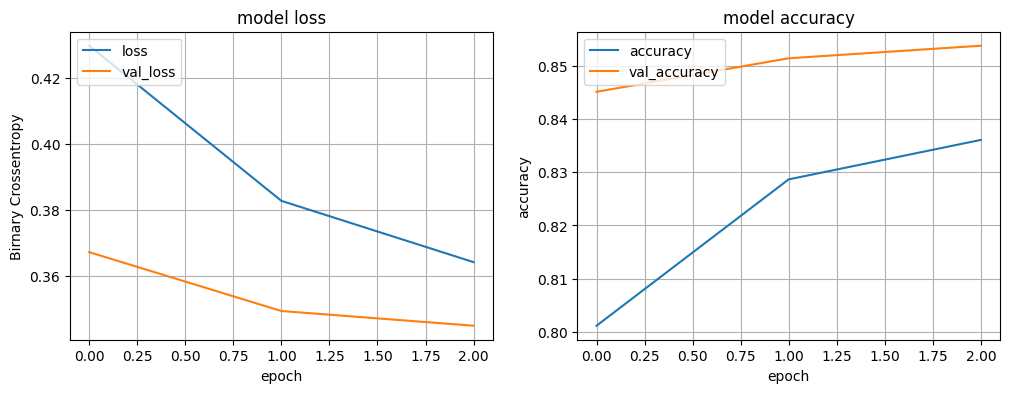

119/119 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8538
Epoch 1/3
232/232 [==============================] - 3s 5ms/step - loss: 0.4458 - accuracy: 0.7929 - val_loss: 0.3895 - val_accuracy: 0.8265
Epoch 2/3
232/232 [==============================] - 1s 4ms/step - loss: 0.3910 - accuracy: 0.8255 - val_loss: 0.3687 - val_accuracy: 0.8465
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 0.3754 - accuracy: 0.8307 - val_loss: 0.3485 - val_accuracy: 0.8541
num_nodes: 128, dropout_prob: 0.2, lr: 0.001, batch_size: 64


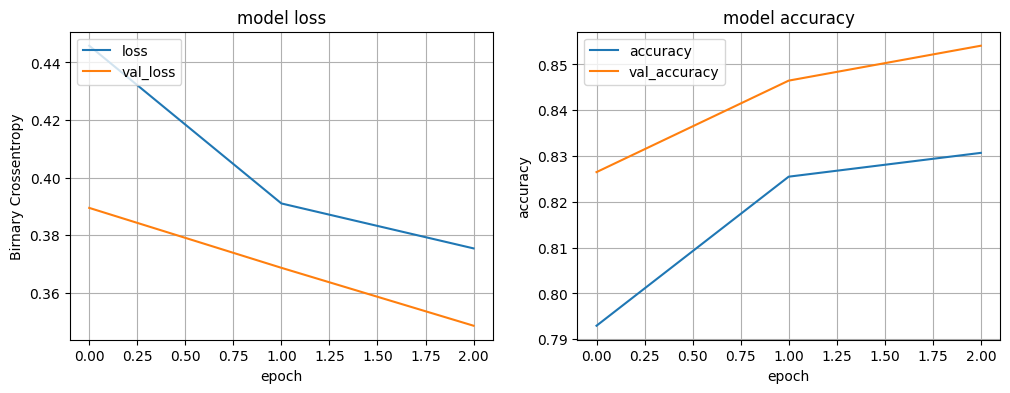

119/119 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8541
Epoch 1/3
116/116 [==============================] - 2s 7ms/step - loss: 0.4717 - accuracy: 0.7722 - val_loss: 0.3937 - val_accuracy: 0.8307
Epoch 2/3
116/116 [==============================] - 1s 6ms/step - loss: 0.3970 - accuracy: 0.8200 - val_loss: 0.3684 - val_accuracy: 0.8457
Epoch 3/3
116/116 [==============================] - 1s 6ms/step - loss: 0.3811 - accuracy: 0.8285 - val_loss: 0.3605 - val_accuracy: 0.8475
num_nodes: 128, dropout_prob: 0.2, lr: 0.001, batch_size: 128


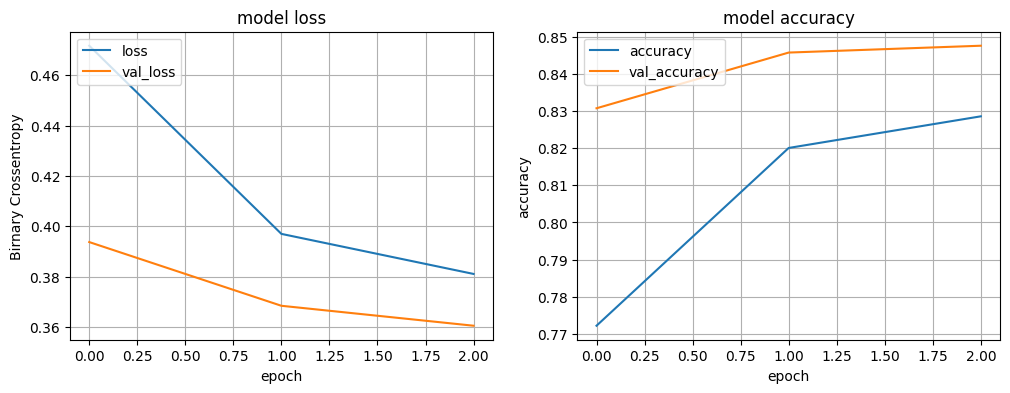

119/119 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8475
Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.4139 - accuracy: 0.8100 - val_loss: 0.3620 - val_accuracy: 0.8473
Epoch 2/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3800 - accuracy: 0.8327 - val_loss: 0.3515 - val_accuracy: 0.8552
Epoch 3/3
463/463 [==============================] - 2s 4ms/step - loss: 0.3692 - accuracy: 0.8338 - val_loss: 0.3594 - val_accuracy: 0.8462
num_nodes: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 32


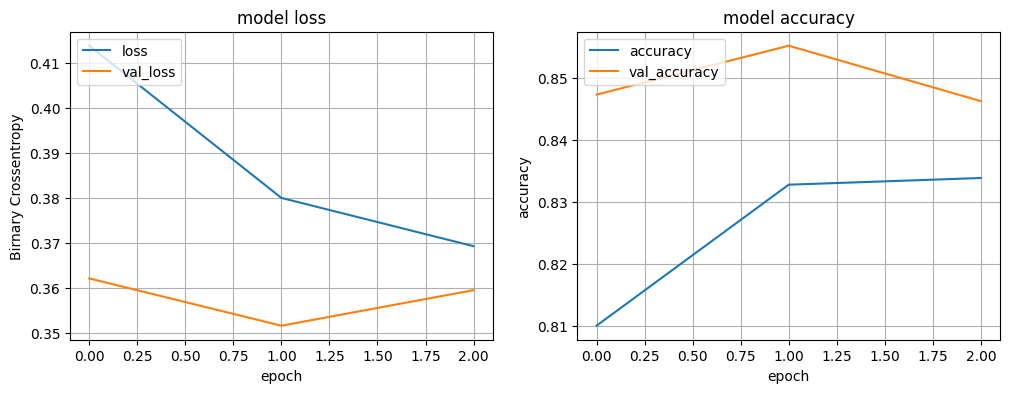

119/119 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8462
Epoch 1/3
232/232 [==============================] - 2s 5ms/step - loss: 0.4176 - accuracy: 0.8094 - val_loss: 0.3537 - val_accuracy: 0.8509
Epoch 2/3
232/232 [==============================] - 1s 4ms/step - loss: 0.3750 - accuracy: 0.8311 - val_loss: 0.3413 - val_accuracy: 0.8567
Epoch 3/3
232/232 [==============================] - 1s 4ms/step - loss: 0.3597 - accuracy: 0.8398 - val_loss: 0.3665 - val_accuracy: 0.8483
num_nodes: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 64


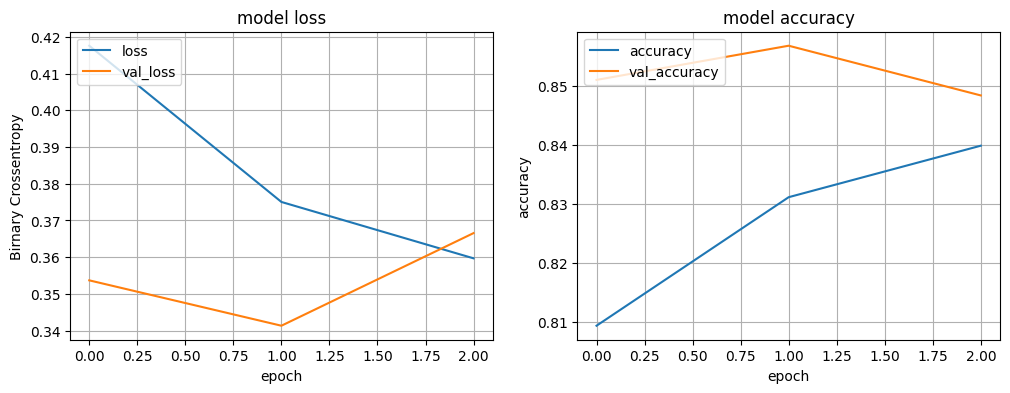

119/119 [==============================] - 0s 3ms/step - loss: 0.3665 - accuracy: 0.8483
Epoch 1/3
116/116 [==============================] - 2s 9ms/step - loss: 0.4153 - accuracy: 0.8074 - val_loss: 0.3721 - val_accuracy: 0.8478
Epoch 2/3
116/116 [==============================] - 1s 6ms/step - loss: 0.3723 - accuracy: 0.8314 - val_loss: 0.3607 - val_accuracy: 0.8417
Epoch 3/3
116/116 [==============================] - 1s 7ms/step - loss: 0.3582 - accuracy: 0.8414 - val_loss: 0.3309 - val_accuracy: 0.8620
num_nodes: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 128


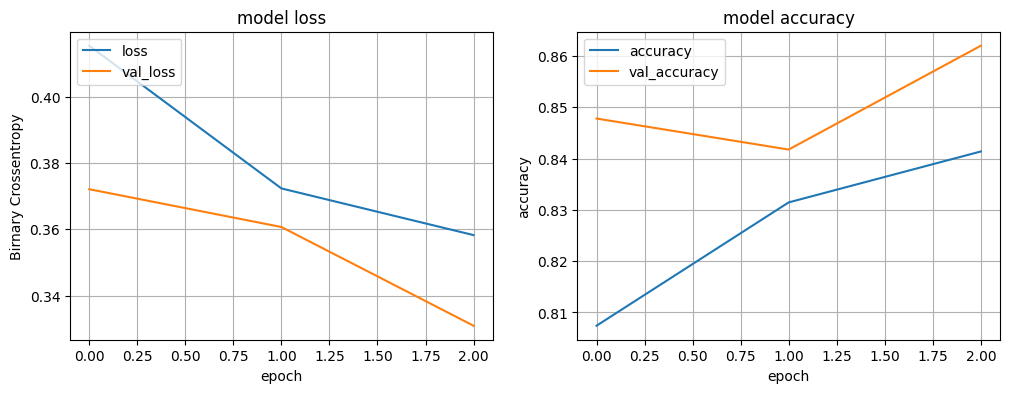

119/119 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8620
Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.7007 - accuracy: 0.6421 - val_loss: 0.6189 - val_accuracy: 0.7311
Epoch 2/3
463/463 [==============================] - 2s 3ms/step - loss: 0.7132 - accuracy: 0.5817 - val_loss: 0.6899 - val_accuracy: 0.3549
Epoch 3/3
463/463 [==============================] - 1s 3ms/step - loss: 0.7123 - accuracy: 0.5200 - val_loss: 0.6901 - val_accuracy: 0.6456
num_nodes: 128, dropout_prob: 0.2, lr: 0.1, batch_size: 32


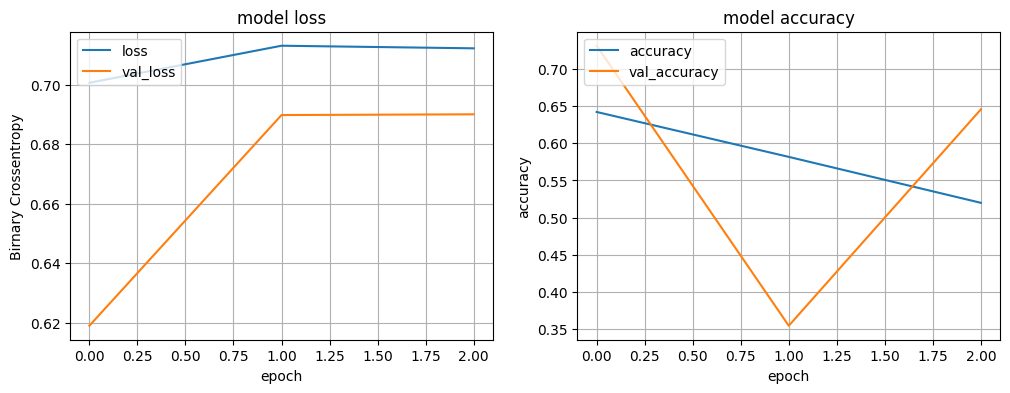

119/119 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.6456
Epoch 1/3
232/232 [==============================] - 2s 6ms/step - loss: 0.5741 - accuracy: 0.7437 - val_loss: 0.4334 - val_accuracy: 0.7271
Epoch 2/3
232/232 [==============================] - 1s 4ms/step - loss: 0.5804 - accuracy: 0.6856 - val_loss: 0.5387 - val_accuracy: 0.6451
Epoch 3/3
232/232 [==============================] - 1s 4ms/step - loss: 0.6468 - accuracy: 0.6174 - val_loss: 0.6086 - val_accuracy: 0.5857
num_nodes: 128, dropout_prob: 0.2, lr: 0.1, batch_size: 64


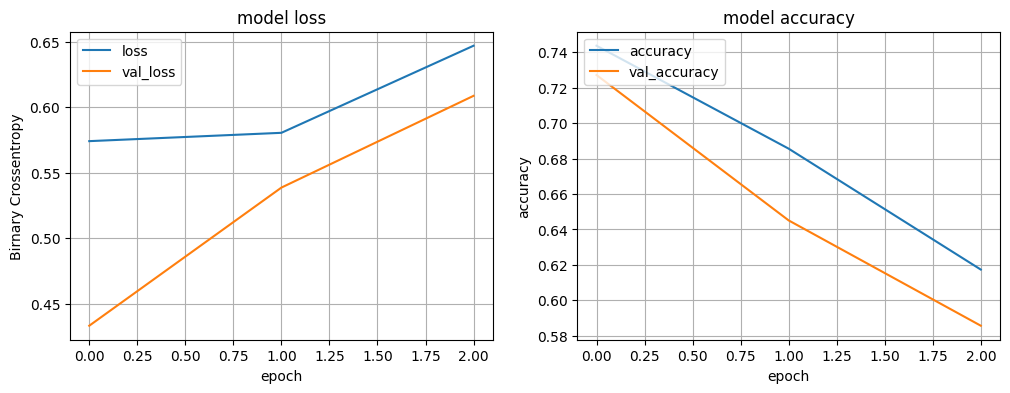

119/119 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.5857
Epoch 1/3
116/116 [==============================] - 2s 7ms/step - loss: 0.5931 - accuracy: 0.7496 - val_loss: 0.4148 - val_accuracy: 0.8086
Epoch 2/3
116/116 [==============================] - 1s 6ms/step - loss: 0.4608 - accuracy: 0.7950 - val_loss: 0.3918 - val_accuracy: 0.8423
Epoch 3/3
116/116 [==============================] - 1s 5ms/step - loss: 0.4809 - accuracy: 0.7725 - val_loss: 0.3853 - val_accuracy: 0.8481
num_nodes: 128, dropout_prob: 0.2, lr: 0.1, batch_size: 128


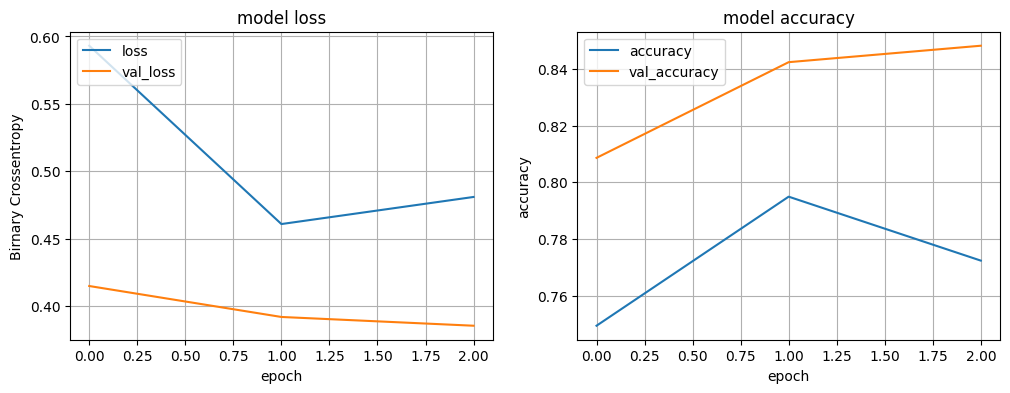

119/119 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8481
Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.4457 - accuracy: 0.7941 - val_loss: 0.3832 - val_accuracy: 0.8341
Epoch 2/3
463/463 [==============================] - 2s 3ms/step - loss: 0.3926 - accuracy: 0.8218 - val_loss: 0.3639 - val_accuracy: 0.8481
Epoch 3/3
463/463 [==============================] - 2s 4ms/step - loss: 0.3791 - accuracy: 0.8313 - val_loss: 0.3411 - val_accuracy: 0.8591
num_nodes: 128, dropout_prob: 0.3, lr: 0.001, batch_size: 32


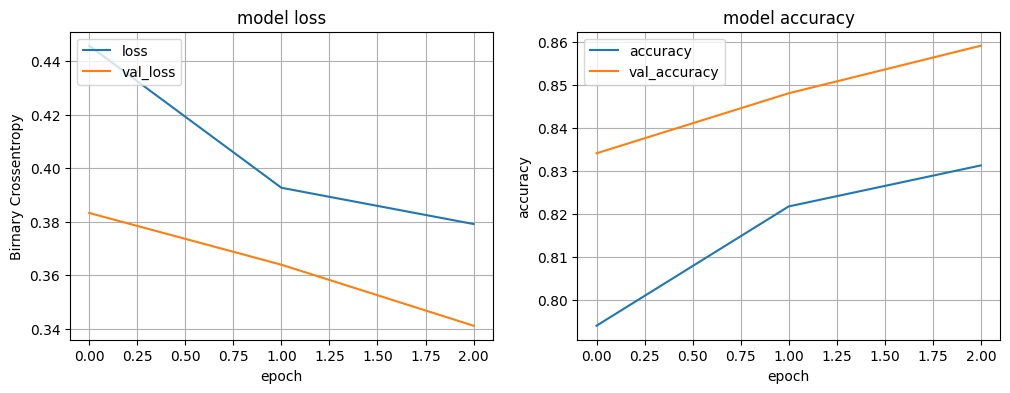

119/119 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8591
Epoch 1/3
232/232 [==============================] - 2s 5ms/step - loss: 0.4618 - accuracy: 0.7796 - val_loss: 0.3959 - val_accuracy: 0.8297
Epoch 2/3
232/232 [==============================] - 1s 4ms/step - loss: 0.4018 - accuracy: 0.8166 - val_loss: 0.3791 - val_accuracy: 0.8360
Epoch 3/3
232/232 [==============================] - 1s 4ms/step - loss: 0.3886 - accuracy: 0.8254 - val_loss: 0.3470 - val_accuracy: 0.8546
num_nodes: 128, dropout_prob: 0.3, lr: 0.001, batch_size: 64


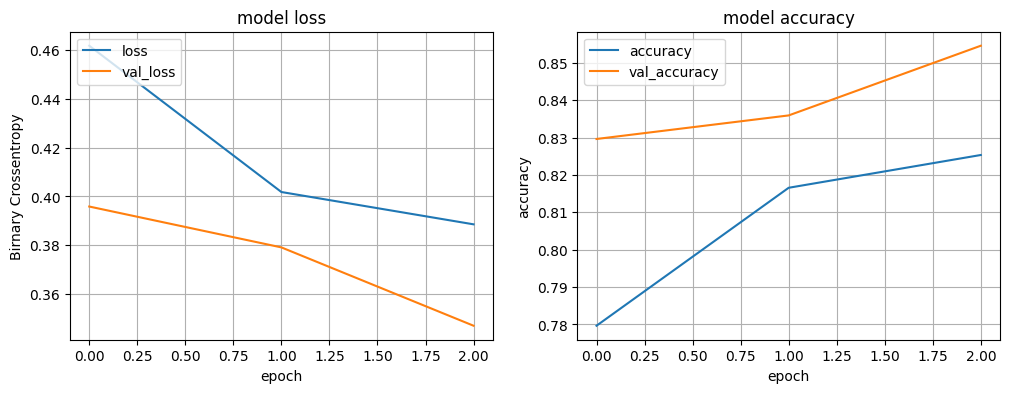

119/119 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8546
Epoch 1/3
116/116 [==============================] - 2s 8ms/step - loss: 0.4862 - accuracy: 0.7561 - val_loss: 0.3964 - val_accuracy: 0.8318
Epoch 2/3
116/116 [==============================] - 1s 5ms/step - loss: 0.4122 - accuracy: 0.8076 - val_loss: 0.3788 - val_accuracy: 0.8370
Epoch 3/3
116/116 [==============================] - 1s 5ms/step - loss: 0.3957 - accuracy: 0.8197 - val_loss: 0.3684 - val_accuracy: 0.8462
num_nodes: 128, dropout_prob: 0.3, lr: 0.001, batch_size: 128


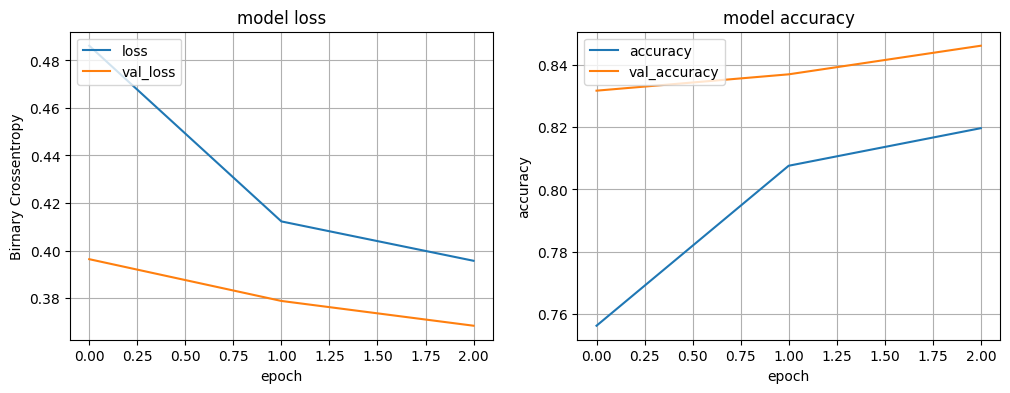

119/119 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8462
Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.4194 - accuracy: 0.8070 - val_loss: 0.3780 - val_accuracy: 0.8375
Epoch 2/3
463/463 [==============================] - 2s 4ms/step - loss: 0.3891 - accuracy: 0.8266 - val_loss: 0.3566 - val_accuracy: 0.8609
Epoch 3/3
463/463 [==============================] - 2s 4ms/step - loss: 0.3793 - accuracy: 0.8291 - val_loss: 0.3602 - val_accuracy: 0.8580
num_nodes: 128, dropout_prob: 0.3, lr: 0.01, batch_size: 32


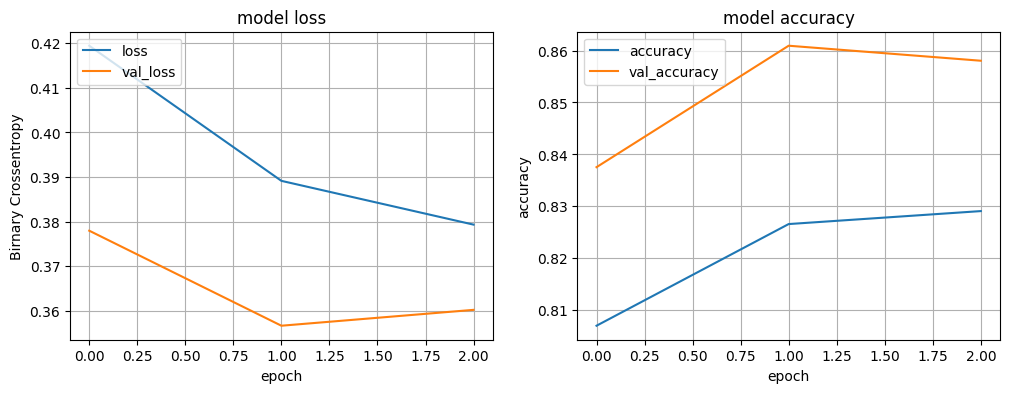

119/119 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8580
Epoch 1/3
232/232 [==============================] - 2s 6ms/step - loss: 0.4191 - accuracy: 0.8073 - val_loss: 0.3434 - val_accuracy: 0.8580
Epoch 2/3
232/232 [==============================] - 1s 5ms/step - loss: 0.3792 - accuracy: 0.8290 - val_loss: 0.3582 - val_accuracy: 0.8475
Epoch 3/3
232/232 [==============================] - 1s 4ms/step - loss: 0.3719 - accuracy: 0.8327 - val_loss: 0.3496 - val_accuracy: 0.8567
num_nodes: 128, dropout_prob: 0.3, lr: 0.01, batch_size: 64


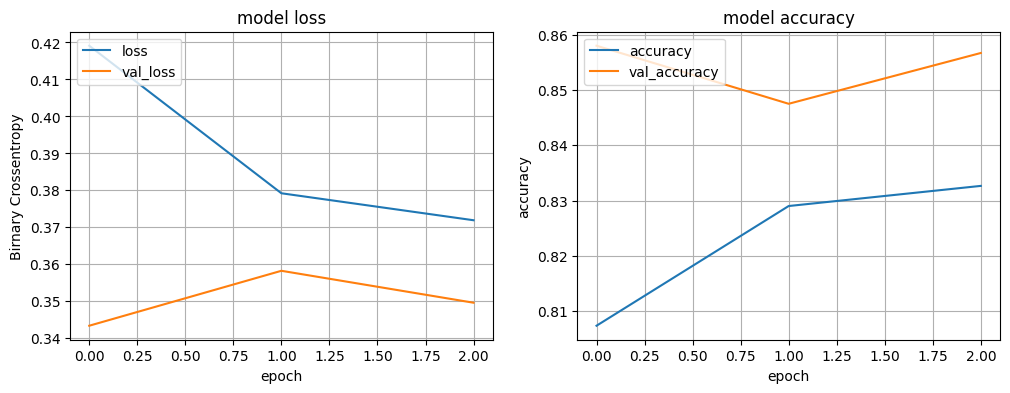

119/119 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8567
Epoch 1/3
116/116 [==============================] - 2s 9ms/step - loss: 0.4199 - accuracy: 0.8067 - val_loss: 0.3507 - val_accuracy: 0.8554
Epoch 2/3
116/116 [==============================] - 1s 6ms/step - loss: 0.3744 - accuracy: 0.8317 - val_loss: 0.3665 - val_accuracy: 0.8533
Epoch 3/3
116/116 [==============================] - 1s 6ms/step - loss: 0.3668 - accuracy: 0.8353 - val_loss: 0.3496 - val_accuracy: 0.8499
num_nodes: 128, dropout_prob: 0.3, lr: 0.01, batch_size: 128


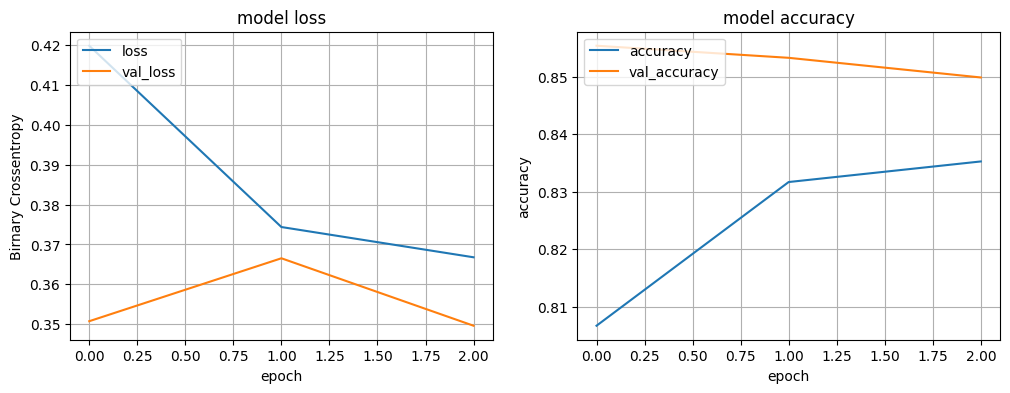

119/119 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8499
Epoch 1/3
463/463 [==============================] - 3s 4ms/step - loss: 0.7273 - accuracy: 0.5911 - val_loss: 0.6848 - val_accuracy: 0.6470
Epoch 2/3
463/463 [==============================] - 2s 3ms/step - loss: 0.6990 - accuracy: 0.5051 - val_loss: 0.7073 - val_accuracy: 0.3549
Epoch 3/3
463/463 [==============================] - 2s 3ms/step - loss: 0.6961 - accuracy: 0.4928 - val_loss: 0.7390 - val_accuracy: 0.3549
num_nodes: 128, dropout_prob: 0.3, lr: 0.1, batch_size: 32


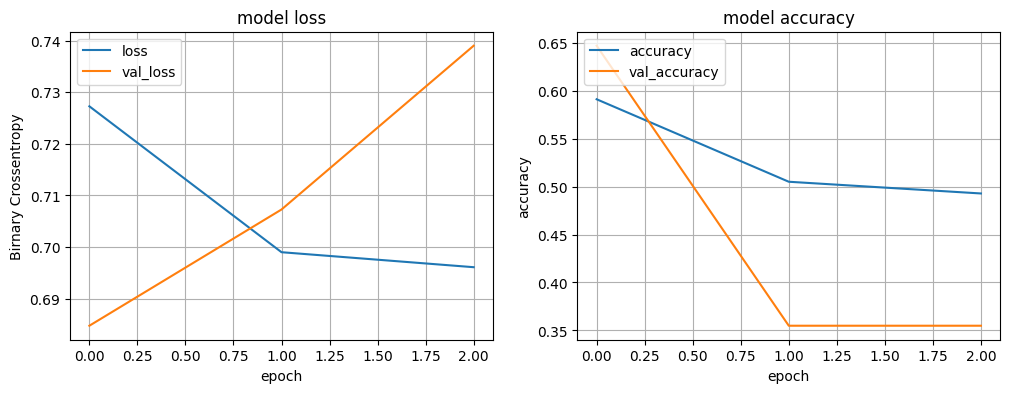

119/119 [==============================] - 0s 2ms/step - loss: 0.7390 - accuracy: 0.3549
Epoch 1/3
232/232 [==============================] - 2s 5ms/step - loss: 0.6138 - accuracy: 0.7137 - val_loss: 0.4732 - val_accuracy: 0.7287
Epoch 2/3
232/232 [==============================] - 1s 4ms/step - loss: 0.5757 - accuracy: 0.6851 - val_loss: 0.5550 - val_accuracy: 0.6606
Epoch 3/3
232/232 [==============================] - 1s 5ms/step - loss: 0.6750 - accuracy: 0.6137 - val_loss: 0.6934 - val_accuracy: 0.5076
num_nodes: 128, dropout_prob: 0.3, lr: 0.1, batch_size: 64


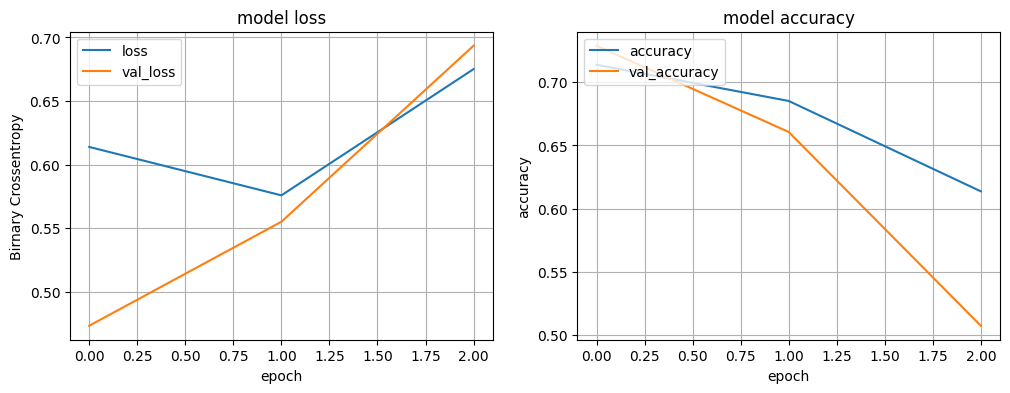

119/119 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5076
Epoch 1/3
116/116 [==============================] - 2s 8ms/step - loss: 0.6592 - accuracy: 0.7368 - val_loss: 0.4245 - val_accuracy: 0.8286
Epoch 2/3
116/116 [==============================] - 1s 6ms/step - loss: 0.4621 - accuracy: 0.7788 - val_loss: 0.3880 - val_accuracy: 0.8502
Epoch 3/3
116/116 [==============================] - 1s 6ms/step - loss: 0.4782 - accuracy: 0.7583 - val_loss: 0.4213 - val_accuracy: 0.8160
num_nodes: 128, dropout_prob: 0.3, lr: 0.1, batch_size: 128


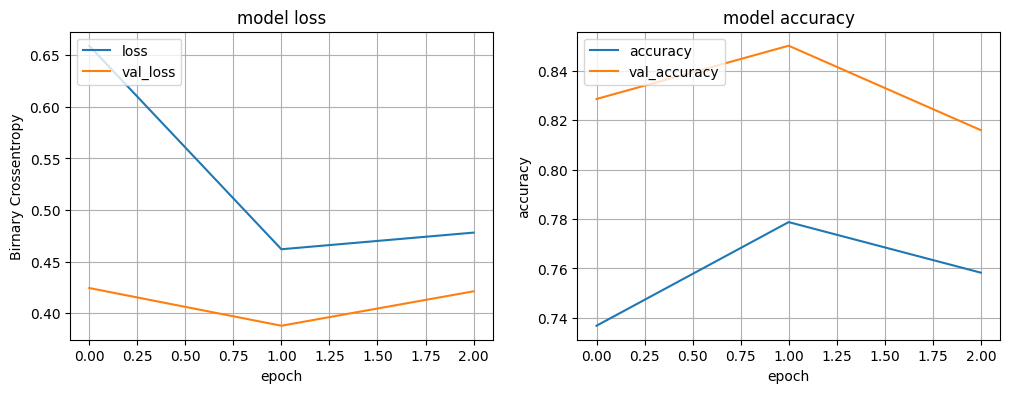

119/119 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8160


In [41]:
epochs = 3
least_val_loss = float('inf')
least_loss_model = None
for num_nodes in [32, 64, 128]:
  for dropout_prob in [0.1, 0.2, 0.3]:
    for lr in [0.001, 0.01, 0.1]:
      for batch_size in [32, 64, 128]:
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        print(f"num_nodes: {num_nodes}, dropout_prob: {dropout_prob}, lr: {lr}, batch_size: {batch_size}")
        plot_history(history)
        val_loss = model.evaluate(X_test, y_test)
        if val_loss[0] < least_val_loss:
          least_val_loss = val_loss[0]
          least_loss_model = model

In [46]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 [==============================] - 1s 4ms/step


array([1, 1, 1, ..., 1, 1, 1])

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1350
           1       0.88      0.91      0.89      2454

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804

